In [1]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù Î™®Îç∏
import statsmodels.formula.api as smf
# ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Ï†ïÍ∑úÏÑ± ÌôïÏù∏: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ÌïôÏäµÏö©/ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Ìòï
from sklearn.linear_model import LinearRegression
# Î≥ÄÏàò ÏÑ†ÌÉùÎ≤ï(ÌõÑÏßÑÏ†úÍ±∞Î≤ï)
from sklearn.feature_selection import RFE
# scale Î≥ÄÌôò -> ÌëúÏ§ÄÌôî ÌöåÍ∑ÄÍ≥ÑÏàò ÏÇ∞Ï∂ú
from sklearn.preprocessing import StandardScaler
# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import r2_score
# ÏÑ†Ìòï Î™®Îç∏
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: ÎÇòÎ¨¥ Íµ¨Ï°∞ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
from sklearn.tree import export_graphviz
# graphviz : ÎÇòÎ¨¥ Íµ¨Ï°∞ ÏãúÍ∞ÅÌôî  (.dot ÌôïÏû•Ïûê ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Îì±)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:train, test
from sklearn.model_selection import train_test_split
# ÏòàÏ∏°/ÌöåÍ∑Ä Decision Tree
from sklearn.tree import DecisionTreeRegressor
# ÏòàÏ∏°/ÌöåÍ∑Ä Random Forest
from sklearn.ensemble import RandomForestRegressor
# ÏµúÏ†Å Î™®Îç∏, ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
from sklearn.model_selection import GridSearchCV
# ÏòàÏ∏°/ÌöåÍ∑Ä Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (macÏö©)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'AppleGothic'

# Ïã§ÌñâÍ≤∞Í≥º Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÏô∏
import warnings

warnings.filterwarnings('ignore')



In [2]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np

# ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ (MacÏö©)
import matplotlib
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Í≤ΩÍ≥† Î¨¥Ïãú
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./data/df_clean.csv', parse_dates=['OrderDT', 'DeliveryDT'])

# ÌôïÏù∏
print("Îç∞Ïù¥ÌÑ∞ shape:", df.shape)
print("Ïª¨Îüº Î™©Î°ù:\n", df.columns)
df.head()


Îç∞Ïù¥ÌÑ∞ shape: (856727, 32)
Ïª¨Îüº Î™©Î°ù:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
1  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
2  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
3  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
4  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1003   

              OrderDT  OrderMonth  OrderDay  ...          DeliveryDT  \
0 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
1 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
2 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
3 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
4 2022-01-13 16:50:00           1        13  ... 2022-01-14 06:28:00   

   Deli_Year  Deli_Month Deli_Day Deli_Hour Deli_Minute Deli_Second  \
0       2022           1        7         6          24           0   
1       2022           1        7         6          24           0   
2       2022           1        7         6          24           0   
3       2022           1        7         6          24           0   
4       2022           1       14         6          28           0   

     Deli_Duration  Deli_Hours  IsMorningDelivery  
0  0 days 13:16:00   13.266667                  1  
1  0 days 13:16:00   13.266667                  1  
2  0 days 13:16:00   13.266667                  1  
3  0 days 13:16:00   13.266667                  1  
4  0 days 13:38:00   13.633333                  1  

[5 rows x 32 columns]

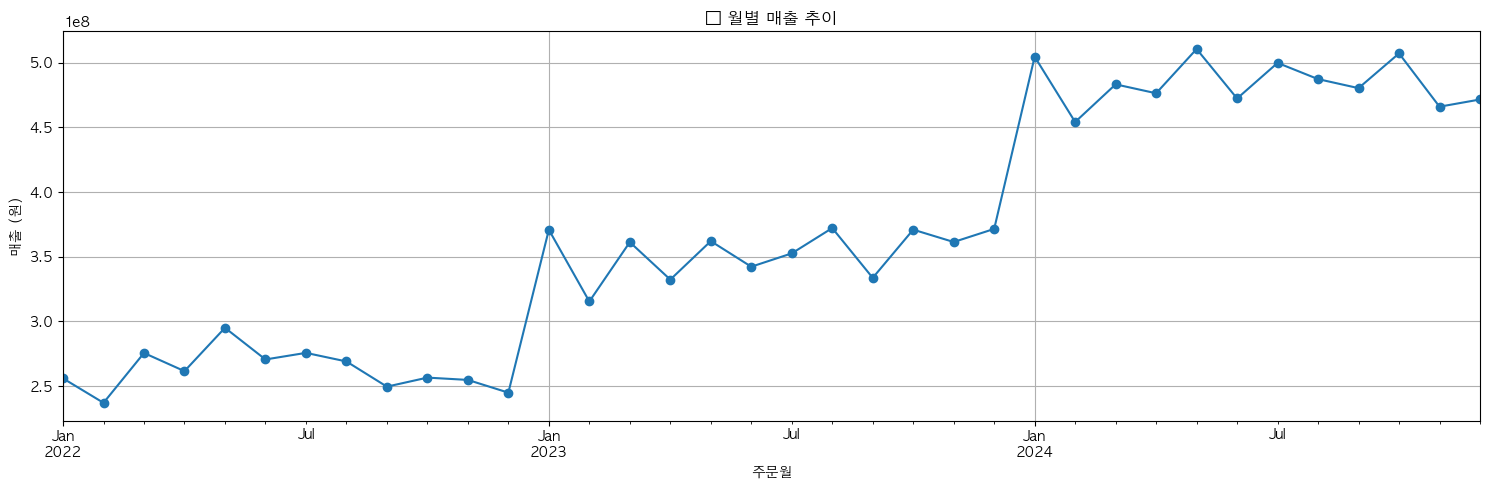

In [ ]:
# Ïõî Îã®ÏúÑ Ï∂îÏ∂ú
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # Period ÌÉÄÏûÖ

# ÏõîÎ≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ
monthly_sales = df.groupby('OrderMonth')['Price'].sum()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.title('ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥')
plt.xlabel('Ï£ºÎ¨∏Ïõî')
plt.ylabel('Îß§Ï∂ú (Ïõê)')
plt.grid(True)
plt.tight_layout()
plt.show()


## ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂úÌå®ÌÑ¥

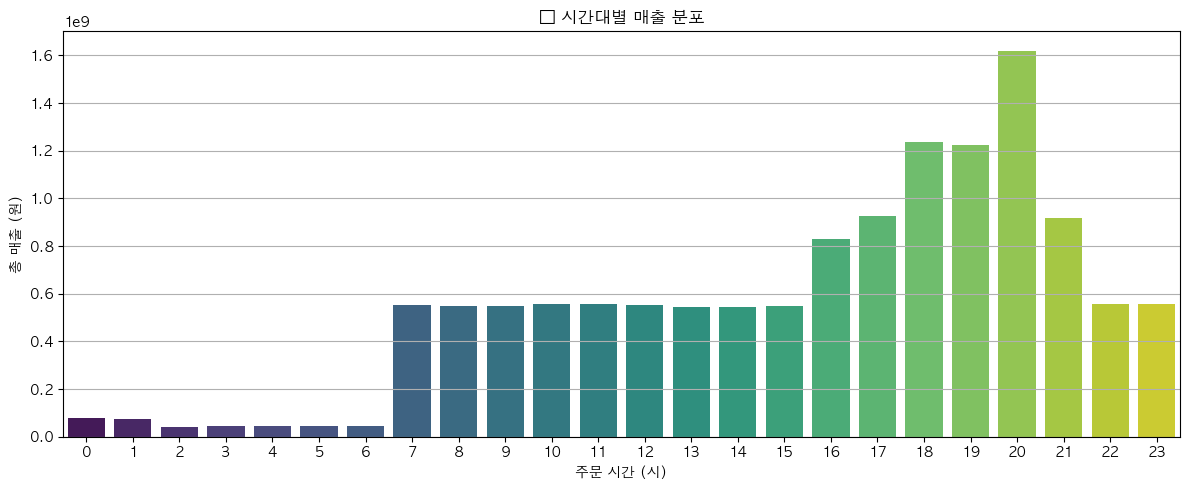

In [ ]:
# ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ
hourly_sales = df.groupby('OrderHour')['Price'].sum()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú Î∂ÑÌè¨")
plt.xlabel("Ï£ºÎ¨∏ ÏãúÍ∞Ñ (Ïãú)")
plt.ylabel("Ï¥ù Îß§Ï∂ú (Ïõê)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


###  [ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú Î∂ÑÌè¨] Ìï¥ÏÑù
Í¥ÄÏ∞∞ Ìè¨Ïù∏Ìä∏:
20Ïãú(Ï†ÄÎÖÅ 8Ïãú) Îß§Ï∂úÏù¥ Í∞ÄÏû• ÎßéÍ≥†, 18~21Ïãú ÏÇ¨Ïù¥Ïóê Îß§Ï∂úÏù¥ ÏßëÏ§ëÎêòÏñ¥ ÏûàÏùå.

ÏÉàÎ≤Ω ÏãúÍ∞ÑÎåÄ (0~6Ïãú) Îß§Ï∂úÏùÄ Í±∞Ïùò ÏóÜÏùå. ‚Üí Í≥†Í∞ùÏù¥ Ï£ºÎ°ú "ÎÇÆÏóê Ï£ºÎ¨∏ÌïòÍ≥† ÏÉàÎ≤ΩÏóê Î∞õÎäî" Ìå®ÌÑ¥.

**Ïò§Ï†Ñ(7~11Ïãú)**ÏóêÎèÑ ÏùºÏ†ïÌïú Îß§Ï∂úÎüâ Ïú†ÏßÄ ‚Üí ÏùºÎ∂Ä Ïò§Ï†Ñ Íµ¨Îß§ Í≥†Í∞ù Ï°¥Ïû¨.

 Ïù∏ÏÇ¨Ïù¥Ìä∏:
ÌîÑÎùºÏûÑ ÌÉÄÏûÑ: 18~21Ïãú

Ïù¥ ÏãúÍ∞ÑÎåÄÏóê ÎßàÏºÄÌåÖ/Ìë∏Ïãú ÏïåÎ¶º/Ìï†Ïù∏ Ïø†Ìè∞ÏùÑ ÏßëÏ§ëÌïòÎ©¥ Îß§Ï∂ú Í∑πÎåÄÌôî Í∞ÄÎä•

ÏÉàÎ≤Ω ÏãúÍ∞ÑÏóê Ï£ºÎ¨∏ Ïú†ÏûÖÏù¥ Í±∞Ïùò ÏóÜÏúºÎØÄÎ°ú, ÏïºÍ∞Ñ Í≥†Í∞ù Ïú†ÏûÖ ÌôïÎåÄÎ•º ÏúÑÌïú ÌÉÄÍ≤ü ÎßàÏºÄÌåÖÎèÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùå (Ïòà: 2030 Ïã±Í∏ÄÍ∞ÄÍµ¨ ÎåÄÏÉÅ Ïã¨Ïïº ÌòúÌÉù)

ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù∏Í∏∞ ÏÉÅÌíàÍµ∞ÎèÑ Ï∂îÌõÑ Î∂ÑÏÑùÌïòÎ©¥ Ï¢ãÏùÑ ÎìØ

## ÏöîÏùºÎ≥Ñ Îß§Ï∂ú Ìå®ÌÑ¥

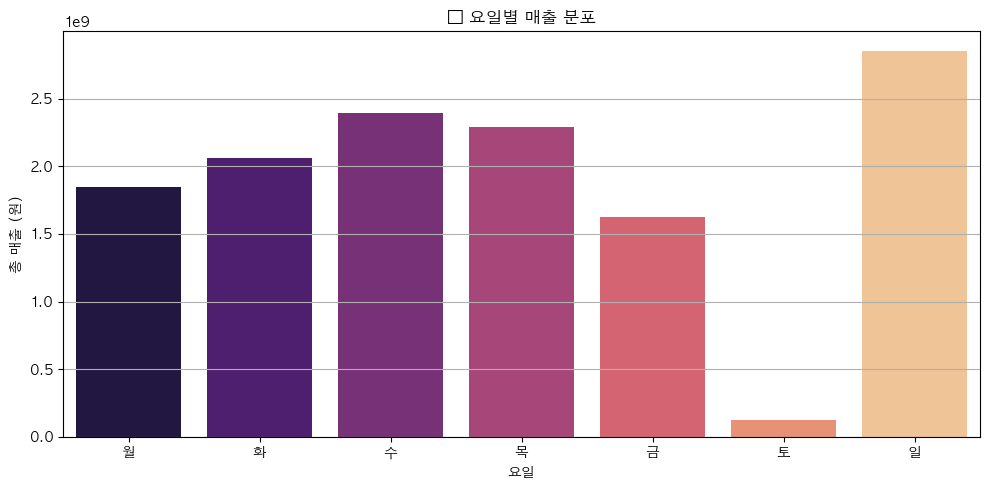

In [ ]:
# ÏöîÏùº Ïª¨Îüº ÏÉùÏÑ± (0=Ïõî, 6=Ïùº)
df['OrderWeekday'] = df['OrderDT'].dt.weekday

# ÌïúÍ∏Ä ÏöîÏùºÎ™Ö Îß§Ìïë
weekday_map = {0:'Ïõî', 1:'Ìôî', 2:'Ïàò', 3:'Î™©', 4:'Í∏à', 5:'ÌÜ†', 6:'Ïùº'}
df['OrderWeekdayName'] = df['OrderWeekday'].map(weekday_map)

# ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
weekday_sales = df.groupby('OrderWeekdayName')['Price'].sum().reindex(['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº'])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='magma')
plt.title("ÏöîÏùºÎ≥Ñ Îß§Ï∂ú Î∂ÑÌè¨")
plt.xlabel("ÏöîÏùº")
plt.ylabel("Ï¥ù Îß§Ï∂ú (Ïõê)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Í≥†Í∞ùÍµ∞(2030 vs 4060) Î≥Ñ ÏãúÍ∞ÑÎåÄ¬∑ÏöîÏùºÎ≥Ñ Îß§Ï∂ú Ìå®ÌÑ¥ ÎπÑÍµê

In [54]:
# Ïó∞Î†πÎåÄ Ïª¨Îüº ('AgeGroup') Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
df_2030 = df[df['AgeGroup'].isin(['20ÎåÄ', '30ÎåÄ'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'])].copy()


### ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú ÎπÑÍµê (2030 vs 4060)

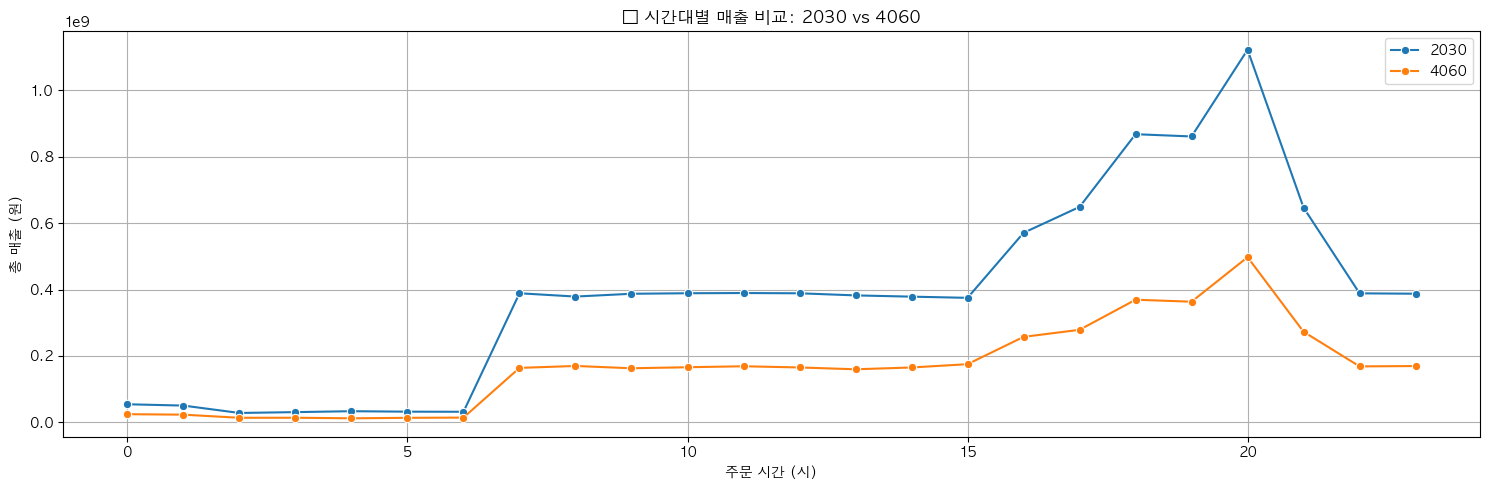

In [ ]:
# Í∑∏Î£πÎ≥Ñ ÏãúÍ∞ÑÎåÄ Îß§Ï∂ú ÏßëÍ≥Ñ
hourly_2030 = df_2030.groupby('OrderHour')['Price'].sum()
hourly_4060 = df_4060.groupby('OrderHour')['Price'].sum()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15,5))
sns.lineplot(x=hourly_2030.index, y=hourly_2030.values, label='2030', marker='o')
sns.lineplot(x=hourly_4060.index, y=hourly_4060.values, label='4060', marker='o')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú ÎπÑÍµê: 2030 vs 4060')
plt.xlabel('Ï£ºÎ¨∏ ÏãúÍ∞Ñ (Ïãú)')
plt.ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÎπÑÍµê (2030 vs 4060)

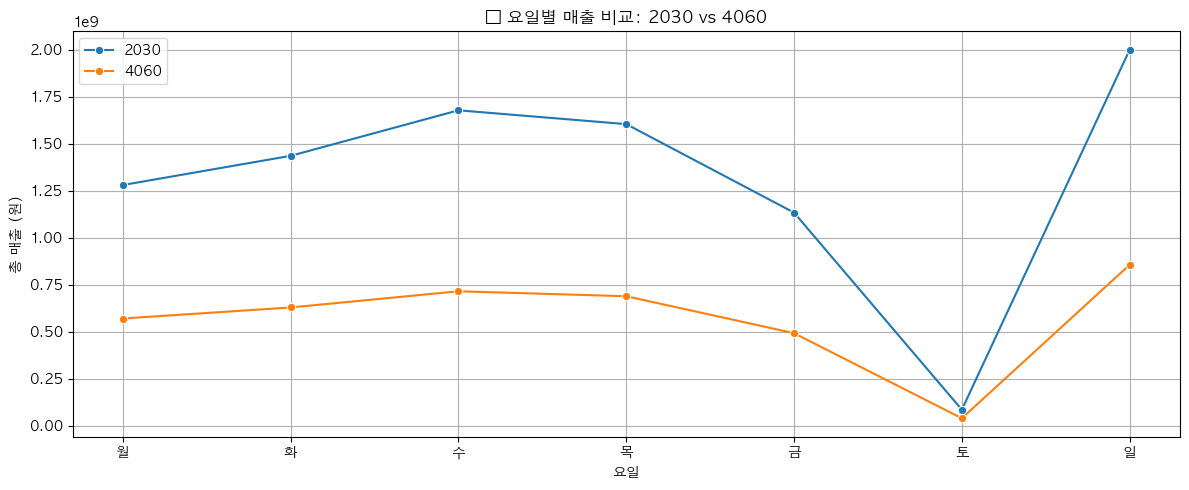

In [56]:
# ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
weekday_2030 = df_2030.groupby('OrderWeekdayName')['Price'].sum().reindex(['Ïõî','Ìôî','Ïàò','Î™©','Í∏à','ÌÜ†','Ïùº'])
weekday_4060 = df_4060.groupby('OrderWeekdayName')['Price'].sum().reindex(['Ïõî','Ìôî','Ïàò','Î™©','Í∏à','ÌÜ†','Ïùº'])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,5))
sns.lineplot(x=weekday_2030.index, y=weekday_2030.values, label='2030', marker='o')
sns.lineplot(x=weekday_4060.index, y=weekday_4060.values, label='4060', marker='o')
plt.title('üìÖ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÎπÑÍµê: 2030 vs 4060')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2030Í≥º 4060 Î™®Îëê ÎπÑÏä∑Ìïú Îß§Ï∂ú Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÑ

üëâ ÌòÑÏû¨ TokddakÏùò ÌîåÎû´ÌèºÏù¥ ÌäπÏ†ï ÏÑ∏ÎåÄÏóê ÌäπÌôîÎêú Ï†ÑÎûµ ÏóÜÏù¥ Ï†Ñ ÏÑ∏ÎåÄÏóêÍ≤å ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú ÏÜåÎπÑÎêòÍ≥† ÏûàÎã§Îäî Îúª

## Í≥†Í∞ùÍµ∞Î≥Ñ(2030 / 4060 )ÏÉÅÌíà ÏÑ†Ìò∏ Î∂ÑÏÑù

In [57]:
# Í≥†Í∞ùÍµ∞ Î∂ÑÎ¶¨
df_2030 = df[df['AgeGroup'].isin(['20ÎåÄ', '30ÎåÄ'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'])].copy()


### Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ ÎπÑÍµê

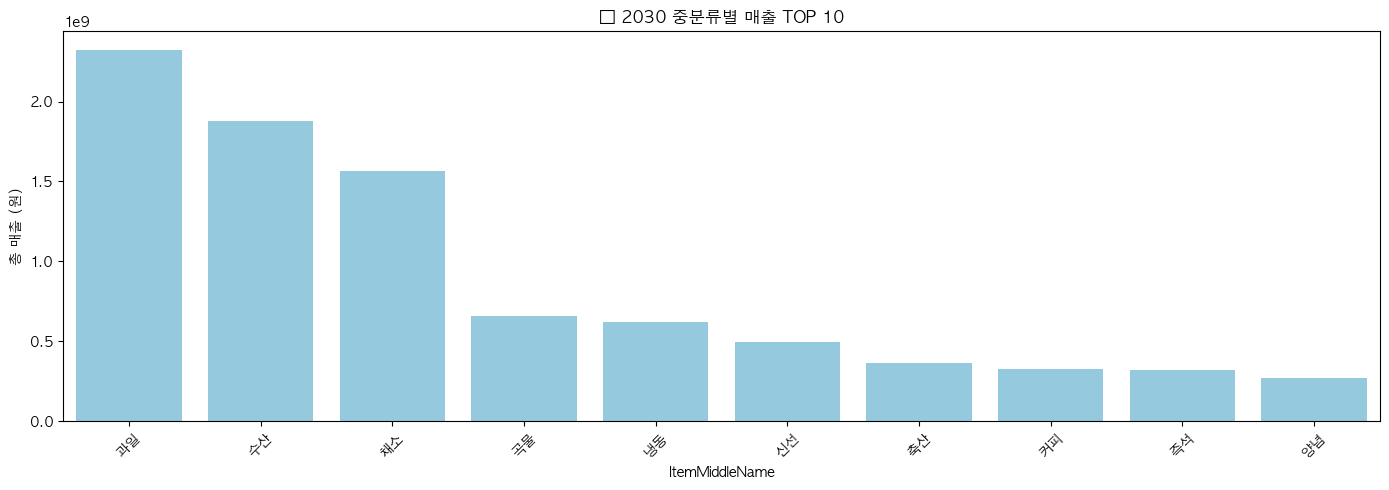

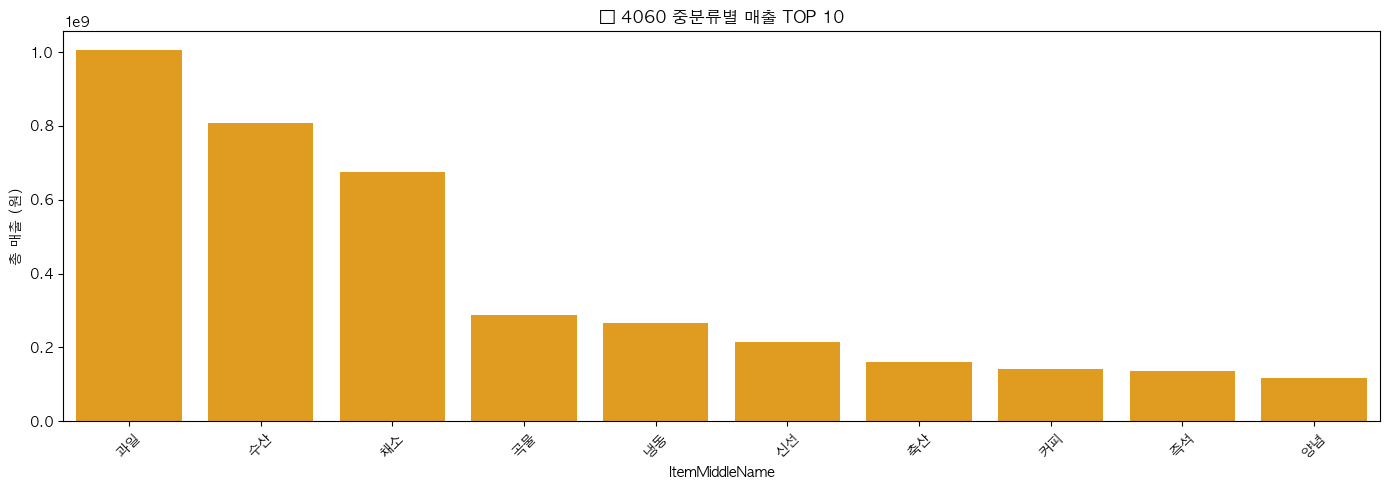

In [58]:
# Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
middle_2030_sales = df_2030.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)
middle_4060_sales = df_4060.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_2030_sales.head(10).index, y=middle_2030_sales.head(10).values, color='skyblue')
plt.title('üí≥ 2030 Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú TOP 10')
plt.xticks(rotation=45)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x=middle_4060_sales.head(10).index, y=middle_4060_sales.head(10).values, color='orange')
plt.title('üí≥ 4060 Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú TOP 10')
plt.xticks(rotation=45)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)')
plt.tight_layout()
plt.show()


### Ï§ëÎ∂ÑÎ•òÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Í∏∞Ï§Ä ÎπÑÍµê (ÏÑ†Ìò∏ÎèÑ ÎäêÎÇå)

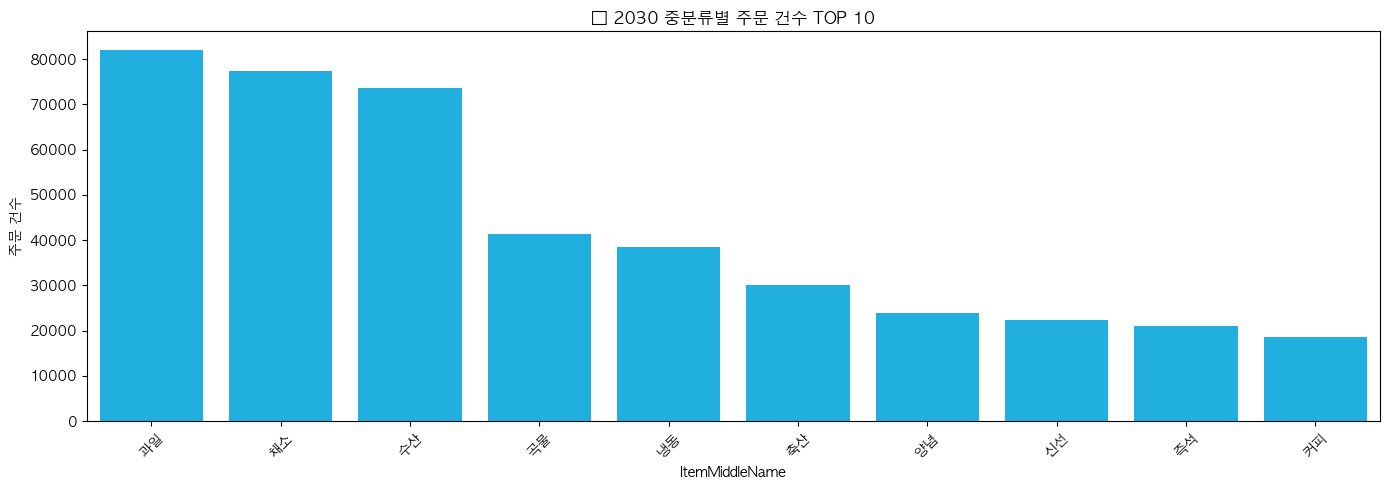

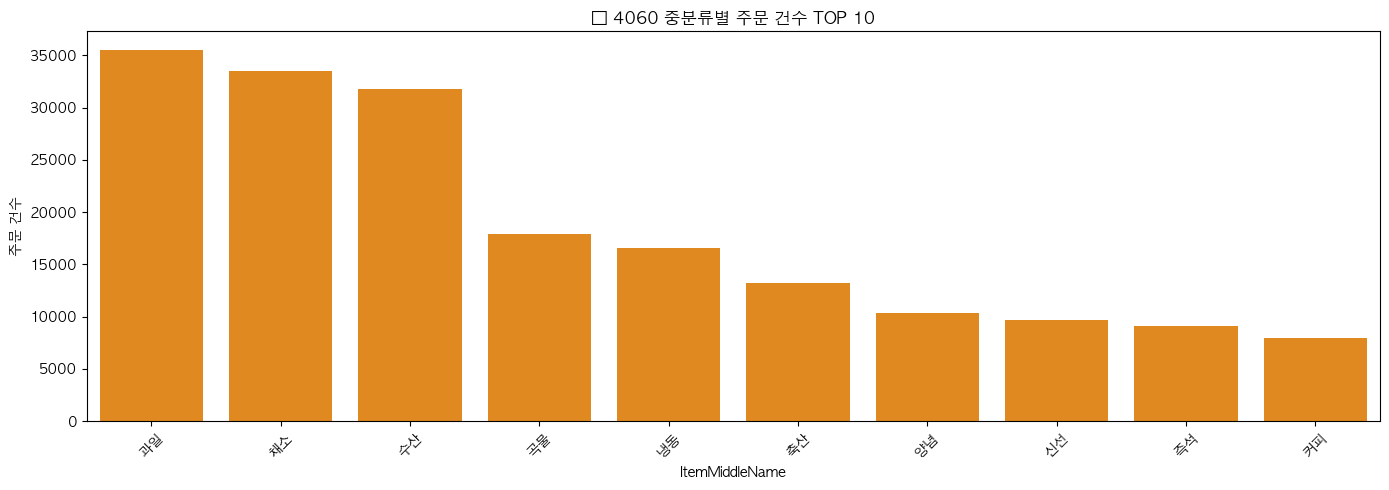

In [59]:
# Ï£ºÎ¨∏ Í±¥Ïàò Í∏∞Ï§Ä
middle_2030_orders = df_2030.groupby('ItemMiddleName')['idOrder'].nunique().sort_values(ascending=False)
middle_4060_orders = df_4060.groupby('ItemMiddleName')['idOrder'].nunique().sort_values(ascending=False)

# TOP 10 ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_2030_orders.head(10).index, y=middle_2030_orders.head(10).values, color='deepskyblue')
plt.title('üì¶ 2030 Ï§ëÎ∂ÑÎ•òÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò TOP 10')
plt.xticks(rotation=45)
plt.ylabel('Ï£ºÎ¨∏ Í±¥Ïàò')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x=middle_4060_orders.head(10).index, y=middle_4060_orders.head(10).values, color='darkorange')
plt.title('üì¶ 4060 Ï§ëÎ∂ÑÎ•òÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò TOP 10')
plt.xticks(rotation=45)
plt.ylabel('Ï£ºÎ¨∏ Í±¥Ïàò')
plt.tight_layout()
plt.show()


## Í≥†Í∞ùÍµ∞Î≥Ñ Ï§ëÎ∂ÑÎ•ò ÏÉÅÌíàÍµ∞Ïùò ÏãúÍ≥ÑÏó¥ Îß§Ï∂ú Ï∂îÏù¥

In [60]:
# Ïõî Îã®ÏúÑ Ïª¨Îüº ÏÉùÏÑ±
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')

# ÏÉÅÏúÑ Ïù∏Í∏∞ Ï§ëÎ∂ÑÎ•ò Í∞Å ÏÑ∏ÎåÄÎ≥Ñ 3Í∞úÏî© Ï∂îÏ∂ú
top_2030_middle = df_2030.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False).head(3).index.tolist()
top_4060_middle = df_4060.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False).head(3).index.tolist()

# ÏÑ∏Ìä∏Î°ú Î¨∂Í∏∞
target_middle_names = list(set(top_2030_middle + top_4060_middle))


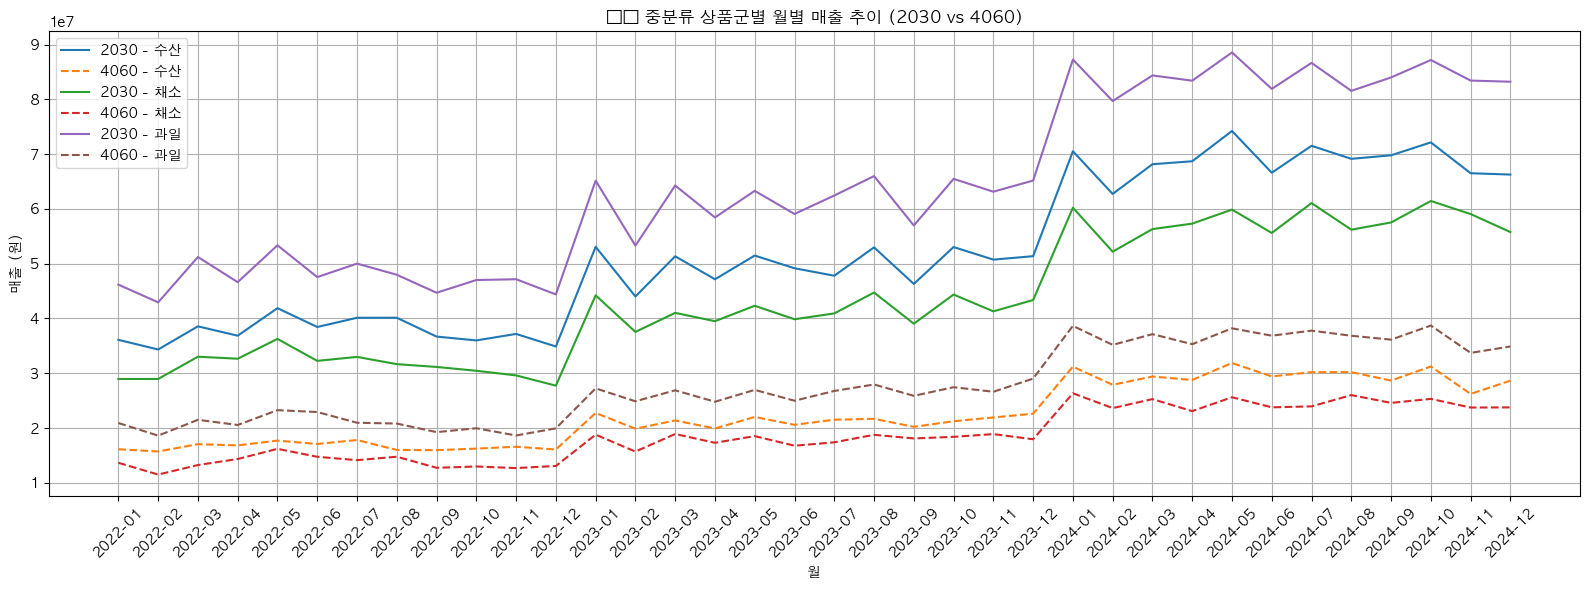

In [61]:
# ÏÑ∏ÎåÄÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
plt.figure(figsize=(16, 6))

for middle in target_middle_names:
    # 2030 Îß§Ï∂ú
    monthly_2030 = df_2030[df_2030['ItemMiddleName'] == middle].groupby('OrderMonth')['Price'].sum()
    sns.lineplot(x=monthly_2030.index.astype(str), y=monthly_2030.values, label=f'2030 - {middle}', linestyle='-')
    
    # 4060 Îß§Ï∂ú
    monthly_4060 = df_4060[df_4060['ItemMiddleName'] == middle].groupby('OrderMonth')['Price'].sum()
    sns.lineplot(x=monthly_4060.index.astype(str), y=monthly_4060.values, label=f'4060 - {middle}', linestyle='--')

plt.title('üï∞Ô∏è Ï§ëÎ∂ÑÎ•ò ÏÉÅÌíàÍµ∞Î≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥ (2030 vs 4060)')
plt.xlabel('Ïõî')
plt.ylabel('Îß§Ï∂ú (Ïõê)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∞úÍ≤¨Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏ Ìè¨Ïù∏Ìä∏ Ï†ïÎ¶¨

‚úÖ 1. 2030Í≥º 4060 Î™®Îëê Í≥ºÏùº¬∑ÏàòÏÇ∞¬∑Ï±ÑÏÜåÎ•º ÌïµÏã¨Ï†ÅÏúºÎ°ú ÏÜåÎπÑ
TokddakÏùò Ï†ÑÏ≤¥ Îß§Ï∂ú Ï£ºÎèÑ ÏÉÅÌíàÍµ∞ = Ïã†ÏÑ†ÏãùÌíà

4060ÎèÑ Í∞ôÏùÄ ÏÉÅÌíàÏùÑ ÏÇ¨Í∏¥ ÌïòÏßÄÎßå ÎπÑÏ§ëÍ≥º Í∑úÎ™®Îäî 2030Î≥¥Îã§ ÏûëÏùå

‚úÖ 2. ÏãúÏ¶åÎ≥Ñ Îß§Ï∂ú Î≥ÄÌôîÍ∞Ä Í±∞Ïùò ÎèôÍ∏∞Ìôî
Ïó∞Îßê(12Ïõî), Ïó∞Ï¥à(1Ïõî)Ïóê Îß§Ï∂ú Í∏âÏ¶ù ‚Üí Î™ÖÏ†à¬∑ÏÑ†Î¨º ÏãúÏ¶å Î∞òÏùëÏúºÎ°ú Ï∂îÏ†ï

2023ÎÖÑ ÌõÑÎ∞òÎ∂ÄÌÑ∞ Íæ∏Ï§ÄÌïú ÏÑ±Ïû•ÏÑ∏ ‚Üí Ï†ÑÏ≤¥ Ìä∏Î†åÎìúÎäî ÏñëÌò∏Ìï®!

‚úÖ 3. 4060ÏùÄ "Îî∞ÎùºÍ∞ÄÎäî ÏÜåÎπÑ Ìå®ÌÑ¥"
2030Ïùò ÏÜåÎπÑ ÌîºÌÅ¨ ÌÉÄÏù¥Î∞çÏóê Ìï®Íªò ÏÉÅÏäπ ‚Üí ÏûêÎ∞úÏ†Å Íµ¨Îß§Î≥¥Îã§Îäî Ïú†ÏûÖ/ÏïåÎ¶º Í∏∞Î∞ò ÏÜåÎπÑÏùº Í∞ÄÎä•ÏÑ±

‚Üí 4060 ÌÉÄÍ≤ü Ìë∏Ïãú Î©îÏãúÏßÄ / ÏΩòÌÖêÏ∏† ÎßàÏºÄÌåÖÏùò Ïó¨ÏßÄÍ∞Ä ÏûàÏùå



### Ï†ÑÏ≤¥ Îß§Ï∂ú Ï∂îÏù¥(Ï§ëÎ∂ÑÎ•òÍ∏∞Ï§Ä)

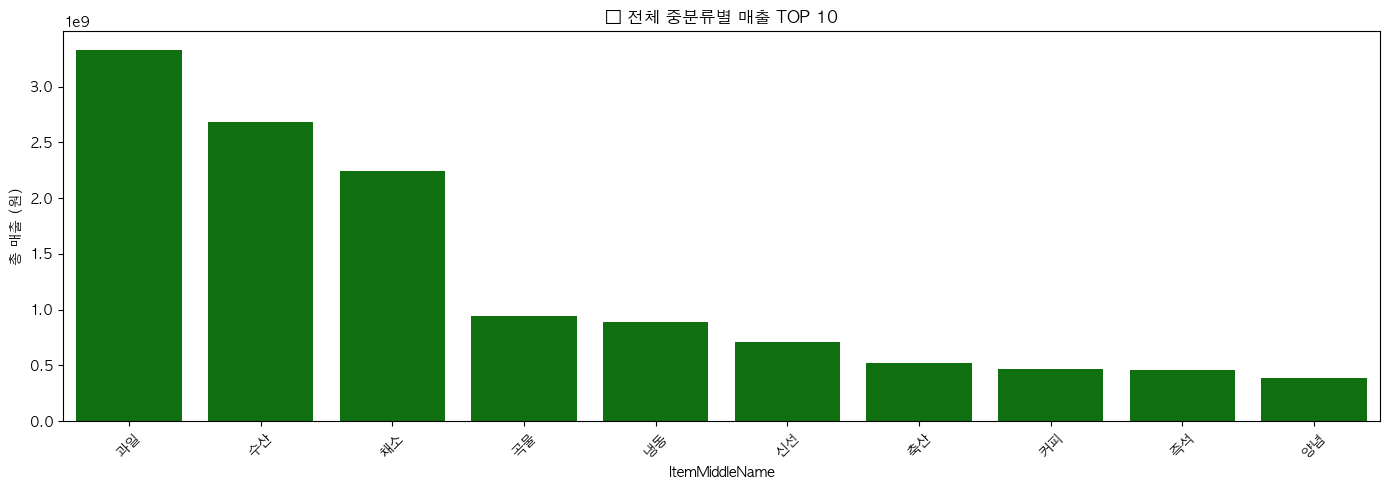

In [90]:
# 2030Í≥º 4060 Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ïπ®
df_all = pd.concat([df_2030, df_4060])

# Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
middle_all_sales = df_all.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_all_sales.head(10).index, y=middle_all_sales.head(10).values, color='green')
plt.title('üí≥ Ï†ÑÏ≤¥ Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú TOP 10')
plt.xticks(rotation=45)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)')
plt.tight_layout()
plt.show()


## 1Ô∏è‚É£ [Í≥†Í∞ù Ïàò Í∏∞Ï§Ä ÎπÑÏ§ë] 2030 vs 4060

In [62]:
# Í≥†Í∞ù Íµ¨Î∂Ñ
df['UserAgeGroup'] = df['AgeGroup'].apply(lambda x: '2030' if x in ['20ÎåÄ', '30ÎåÄ'] 
                                          else '4060' if x in ['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'] else 'Í∏∞ÌÉÄ')

# Í≥†Ïú† Í≥†Í∞ù Ïàò Í∏∞Ï§Ä ÎπÑÏ§ë
user_counts = df.groupby('UserAgeGroup')['idUser'].nunique()
user_share = user_counts / user_counts.sum()

print("üéØ Í≥†Í∞ù Ïàò Í∏∞Ï§Ä Ïó∞Î†πÎåÄ ÎπÑÏ§ë:\n", user_share)


üéØ Í≥†Í∞ù Ïàò Í∏∞Ï§Ä Ïó∞Î†πÎåÄ ÎπÑÏ§ë:
 UserAgeGroup
2030    0.7
4060    0.3
Name: idUser, dtype: float64


In [63]:
# Ïó∞Î†πÎåÄÎ≥Ñ Ï¥ù Îß§Ï∂ú & Ï¥ù Ï£ºÎ¨∏ Ïàò
grouped = df.groupby('UserAgeGroup').agg({'Price':'sum', 'idOrder':'nunique'})
grouped['Í∞ùÎã®Í∞Ä'] = grouped['Price'] / grouped['idOrder']

print("üí∞ Í≥†Í∞ùÍµ∞Î≥Ñ Í∞ùÎã®Í∞Ä ÎπÑÍµê:\n", grouped[['Í∞ùÎã®Í∞Ä']])


üí∞ Í≥†Í∞ùÍµ∞Î≥Ñ Í∞ùÎã®Í∞Ä ÎπÑÍµê:
                        Í∞ùÎã®Í∞Ä
UserAgeGroup              
2030          77103.230046
4060          76910.392724


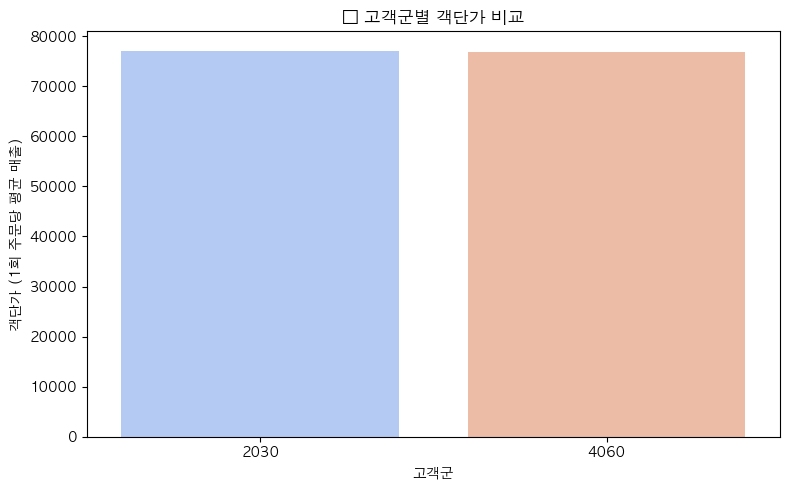

In [64]:
# Í∞ùÎã®Í∞Ä ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped['Í∞ùÎã®Í∞Ä'].values, palette='coolwarm')
plt.title("üí≥ Í≥†Í∞ùÍµ∞Î≥Ñ Í∞ùÎã®Í∞Ä ÎπÑÍµê")
plt.ylabel("Í∞ùÎã®Í∞Ä (1Ìöå Ï£ºÎ¨∏Îãπ ÌèâÍ∑† Îß§Ï∂ú)")
plt.xlabel("Í≥†Í∞ùÍµ∞")
plt.tight_layout()
plt.show()


## Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏

‚úÖ 1. 4060ÏùÄ Ï∂©ÏÑ±ÎèÑÎèÑ ÏûàÍ≥†, ÏßÄÍ∞ëÎèÑ Ïó∞Îã§
Í∞ùÎã®Í∞ÄÍ∞Ä 2030Í≥º ÎèôÎì± ÏàòÏ§ÄÏù¥ÎùºÎäî Í±¥,
üëâ Íµ¨Îß§Î†•ÏùÄ Ï∂©Î∂ÑÌïòÎã§Îäî Ï¶ùÍ±∞!

Î¨∏Ï†úÎäî "Ïàò"Í∞Ä Ï†ÅÎã§Îäî Í≤ÉÎøê ‚Üí Ïú†ÏûÖ Ï†ÑÎûµÏù¥ ÌïµÏã¨

‚úÖ 2. ÏßÄÍ∏àÏùÄ 2030 Ï§ëÏã¨ ÎßàÏºÄÌåÖ Íµ¨Ï°∞
Ï†ÑÏ≤¥ Í≥†Í∞ù 70%Í∞Ä 2030 = Í∏∞Ï°¥ Î∏åÎûúÎî©/UX/UIÍ∞Ä Ïù¥Îì§ÏóêÍ≤å ÏµúÏ†ÅÌôîÎêòÏñ¥ ÏûàÎã§Îäî ÏùòÎØ∏

üëâ Îî∞ÎùºÏÑú 4060Ïù¥ Ïù¥ÌÉàÌïòÍ±∞ÎÇò ÏÜåÏô∏Îê† Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏùå

‚úÖ 3. 4060ÏùÑ "ÌäπÌôî ÌÉÄÍπÉ"ÏúºÎ°ú ÎÅåÏñ¥Ïò¨ Ï†ÑÎûµ ÌïÑÏöî
Í∑∏Îì§ÏùÄ ÏÇ¨Îäî ÌûòÏù¥ ÏûàÎã§. ÌïòÏßÄÎßå Ïò§ÏßÄ ÏïäÎäîÎã§.

Ï¶â, **"Ïú†ÏûÖ Í≤ΩÎ°ú ÏÑ§Í≥Ñ + ÏπúÏàôÌï® Ïú†ÎèÑ + Ïã†Î¢∞ÏÑ± Í∞ïÏ°∞"**Í∞Ä Í¥ÄÍ±¥

## 4060 Í≥†Í∞ùÏùò Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ Î∂ÑÏÑù

In [65]:
# 4060 Í≥†Í∞ù Ï£ºÎ¨∏Îßå Ï∂îÏ∂ú
df_4060 = df[df['AgeGroup'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'])].copy()

# ÎÇ†ÏßúÎßå Ï∂îÏ∂ú
df_4060['OrderDate'] = df_4060['OrderDT'].dt.date

# Í≥†Í∞ùÎ≥Ñ Ï£ºÎ¨∏ ÏùºÏûê Ï†ïÎ†¨
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])


In [66]:
# ÎÇ†ÏßúÎ•º datetimeÏúºÎ°ú Ïú†ÏßÄ
df_4060['OrderDate'] = pd.to_datetime(df_4060['OrderDT'].dt.date)

# Í≥†Í∞ùÎ≥Ñ Ï£ºÎ¨∏ ÎÇ†Ïßú Ï†ïÎ†¨ Î∞è Ïù¥Ï†Ñ Ï£ºÎ¨∏Í≥ºÏùò Ï∞®Ïù¥ Í≥ÑÏÇ∞
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_4060_sorted['PrevOrderDate'] = df_4060_sorted.groupby('idUser')['OrderDate'].shift(1)

# Ï∞®Ïù¥ Í≥ÑÏÇ∞ (timedelta ‚Üí ÏùºÏàò)
df_4060_sorted['DaysSinceLastOrder'] = (df_4060_sorted['OrderDate'] - df_4060_sorted['PrevOrderDate']).dt.days


In [67]:
# ÎÇ†ÏßúÎ•º datetimeÏúºÎ°ú Ïú†ÏßÄ
df_4060['OrderDate'] = pd.to_datetime(df_4060['OrderDT'].dt.date)

# Í≥†Í∞ùÎ≥Ñ Ï£ºÎ¨∏ ÎÇ†Ïßú Ï†ïÎ†¨ Î∞è Ïù¥Ï†Ñ Ï£ºÎ¨∏Í≥ºÏùò Ï∞®Ïù¥ Í≥ÑÏÇ∞
df_4060_sorted = df_4060[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_4060_sorted['PrevOrderDate'] = df_4060_sorted.groupby('idUser')['OrderDate'].shift(1)

# Ï∞®Ïù¥ Í≥ÑÏÇ∞ (timedelta ‚Üí ÏùºÏàò)
df_4060_sorted['DaysSinceLastOrder'] = (df_4060_sorted['OrderDate'] - df_4060_sorted['PrevOrderDate']).dt.days


üìÖ 4060 Í≥†Í∞ù ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞: 17.29Ïùº


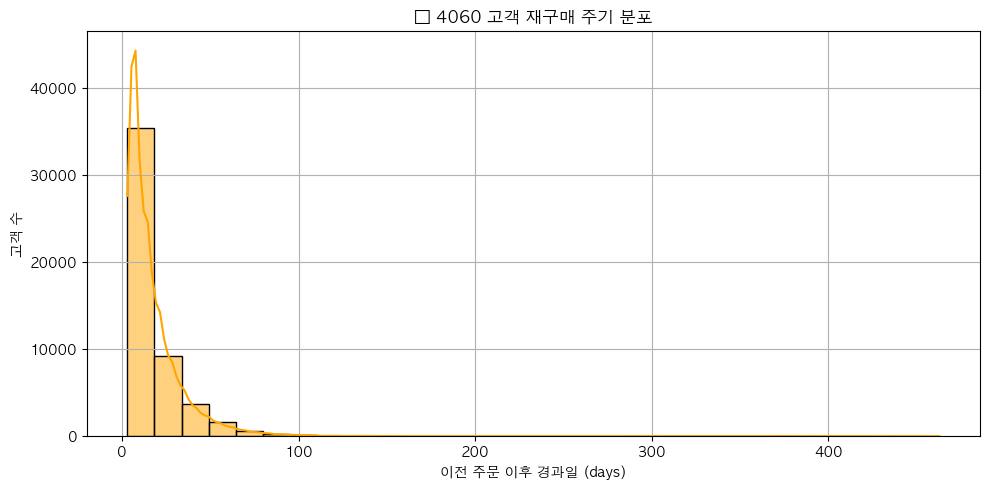

In [68]:
# Ï†ÑÏ≤¥ 4060 Í≥†Í∞ùÏùò Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ ÌèâÍ∑†
avg_days = df_4060_sorted['DaysSinceLastOrder'].mean()
print(f'üìÖ 4060 Í≥†Í∞ù ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞: {avg_days:.2f}Ïùº')

# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5))
sns.histplot(df_4060_sorted['DaysSinceLastOrder'].dropna(), bins=30, kde=True, color='orange')
plt.title('üìä 4060 Í≥†Í∞ù Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ Î∂ÑÌè¨')
plt.xlabel('Ïù¥Ï†Ñ Ï£ºÎ¨∏ Ïù¥ÌõÑ Í≤ΩÍ≥ºÏùº (days)')
plt.ylabel('Í≥†Í∞ù Ïàò')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
# 2030 Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df_2030 = df[df['AgeGroup'].isin(['20ÎåÄ', '30ÎåÄ'])].copy()
df_2030['OrderDate'] = pd.to_datetime(df_2030['OrderDT'].dt.date)

# Ï†ïÎ†¨ Î∞è Ï∞®Ïù¥ Í≥ÑÏÇ∞
df_2030_sorted = df_2030[['idUser', 'OrderDate']].drop_duplicates().sort_values(['idUser', 'OrderDate'])
df_2030_sorted['PrevOrderDate'] = df_2030_sorted.groupby('idUser')['OrderDate'].shift(1)
df_2030_sorted['DaysSinceLastOrder'] = (df_2030_sorted['OrderDate'] - df_2030_sorted['PrevOrderDate']).dt.days


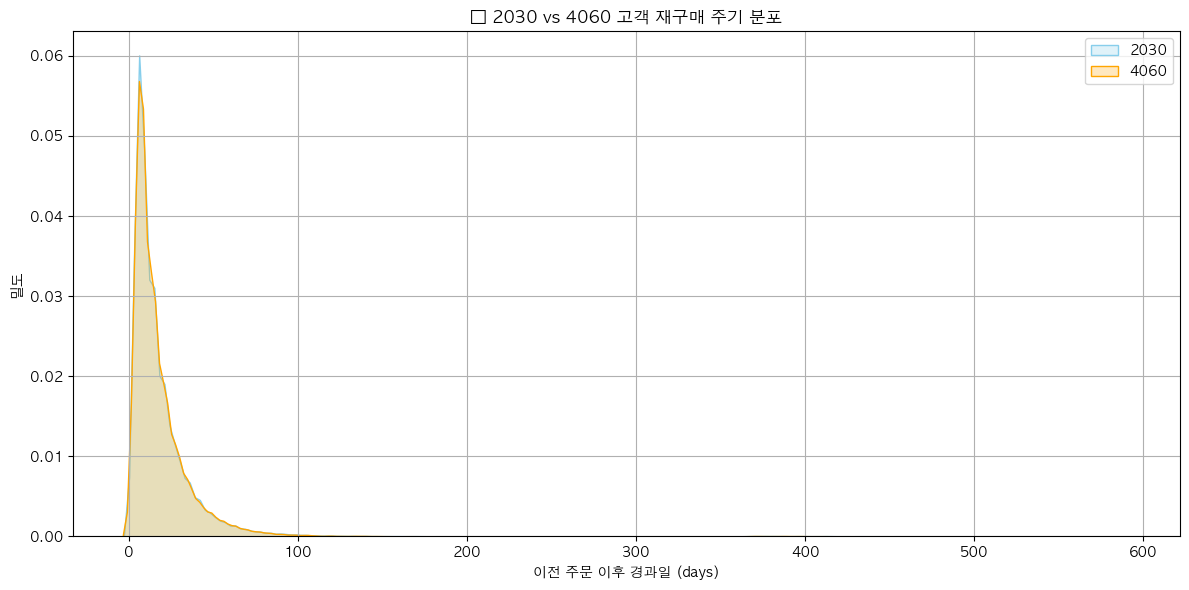

In [70]:
plt.figure(figsize=(12,6))

sns.kdeplot(df_2030_sorted['DaysSinceLastOrder'].dropna(), label='2030', fill=True, color='skyblue')
sns.kdeplot(df_4060_sorted['DaysSinceLastOrder'].dropna(), label='4060', fill=True, color='orange')

plt.title('üìä 2030 vs 4060 Í≥†Í∞ù Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ Î∂ÑÌè¨')
plt.xlabel('Ïù¥Ï†Ñ Ï£ºÎ¨∏ Ïù¥ÌõÑ Í≤ΩÍ≥ºÏùº (days)')
plt.ylabel('Î∞ÄÎèÑ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
mean_2030 = df_2030_sorted['DaysSinceLastOrder'].mean()
mean_4060 = df_4060_sorted['DaysSinceLastOrder'].mean()

print(f'üìÖ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞')
print(f'   üîπ 2030 Í≥†Í∞ù: {mean_2030:.2f}Ïùº')
print(f'   üî∏ 4060 Í≥†Í∞ù: {mean_4060:.2f}Ïùº')


üìÖ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞
   üîπ 2030 Í≥†Í∞ù: 17.40Ïùº
   üî∏ 4060 Í≥†Í∞ù: 17.29Ïùº


## üéØ ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏

‚úÖ 1. 4060 Í≥†Í∞ù, ÏÉùÍ∞ÅÎ≥¥Îã§ Ìõ®Ïî¨ Ï∂©ÏÑ±ÎèÑÍ∞Ä ÎÜíÎã§
2030Î≥¥Îã§ ÏïΩÍ∞Ñ Îçî ÏûêÏ£º Ïû¨Íµ¨Îß§ÌïúÎã§Îäî Í±¥ Ï∂©ÏÑ±ÎèÑ Ï∏°Î©¥ÏóêÏÑú Ï†àÎåÄ Î∞ÄÎ¶¨ÏßÄ ÏïäÎäîÎã§Îäî Ï¶ùÍ±∞!

ÏàòÎäî Ï†ÅÏßÄÎßå, Ïò® ÏÇ¨ÎûåÏùÄ ÌôïÏã§Ìûà ÏÇ¨Í≥† Îòê ÏÇ∞Îã§

‚ÄúÏú†ÏûÖÎßå ÎêòÎ©¥ Ïûò ÏÇ∞Îã§‚Äù
üëâ Ïù¥ ÎßêÏù¥ ÏôÑÏ†ÑÌûà Ï¶ùÎ™ÖÎêú ÏÖà!

‚úÖ 2. Î¨∏Ï†úÎäî Ï∂©ÏÑ±ÎèÑÍ∞Ä ÏïÑÎãàÎùº ‚ÄòÏú†ÏûÖ Ï±ÑÎÑê‚ÄôÏù¥Îã§
ÏïûÏÑú Î¥§ÎìØÏù¥ Ï†ÑÏ≤¥ Í≥†Í∞ù Ï§ë 4060ÏùÄ 30%Îøê

ÌïòÏßÄÎßå Í∞ùÎã®Í∞ÄÎèÑ Ïú†ÏÇ¨ÌïòÍ≥†, Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ÎèÑ ÎèôÍ∏â

‚Üí ‚ÄúÏ∂©ÏÑ±Í≥†Í∞ù Í∏∞Î∞òÏùÑ Îçî ÌôïÎ≥¥ÌïòÍ∏∞ ÏúÑÌïú Ïú†ÏûÖ Ï†ÑÎûµ‚ÄùÏù¥ ÌïµÏã¨ Í≥ºÏ†ú

‚úÖ 3. 4060 ÎåÄÏÉÅ Î¶¨ÌÖêÏÖò ÎßàÏºÄÌåÖ Ï∂©Î∂ÑÌûà Ìï¥Î≥ºÎßå ÌïòÎã§
Í≥†Í∞ù Ïó¨Ï†ïÏóê ÎßûÏ∂ò Î¶¨ÎßàÏù∏Îìú Ìë∏Ïãú, ÎßûÏ∂§ Ï∂îÏ≤ú, Ï†ïÍ∏∞Î∞∞ÏÜ° Ï†ÑÌôò Îì± Í∞ÄÎä•





## 4060 Í≥†Í∞ùÏùÑ ÏúÑÌïú Ï†ïÍ∏∞Î∞∞ÏÜ°¬∑Î¨∂ÏùåÏÉÅÌíà Ï†ÑÎûµ ÏàòÎ¶Ω

üëâ "Íæ∏Ï§ÄÌûà Î∞òÎ≥µÏ†ÅÏúºÎ°ú Íµ¨Îß§ÌïòÎäî ÏÉÅÌíàÍµ∞"
üëâ "ÎèôÏãúÏóê ÏûêÏ£º Íµ¨Îß§ÎêòÎäî ÌíàÎ™© Ï°∞Ìï©"

In [72]:
# # Í≥†Í∞ù-ÏÉÅÌíà Ï°∞Ìï©ÏúºÎ°ú Î™á Î≤à Ï£ºÎ¨∏ÌñàÎäîÏßÄ ÏßëÍ≥Ñ
# repeat_items_4060 = (
#     df_4060.groupby(['idUser', 'ItemMiddleName'])['idOrder']
#     .nunique()
#     .reset_index()
#     .rename(columns={'idOrder': 'OrderCount'})
# )

# # Î∞òÎ≥µ Íµ¨Îß§ ÎÜíÏùÄ ÏÉÅÌíà ÏÑ†Î≥Ñ
# top_repeat_items = (
#     repeat_items_4060.groupby('ItemMiddleName')['OrderCount']
#     .mean()
#     .sort_values(ascending=False)
# )

# # ÏÉÅÏúÑ 10Í∞úÎßå ÏãúÍ∞ÅÌôî
# plt.figure(figsize=(12,5))
# sns.barplot(x=top_repeat_items.head(10).index, y=top_repeat_items.head(10).values, palette='Oranges')
# plt.title('üîÅ 4060 Í≥†Í∞ùÏùò Î∞òÎ≥µ Íµ¨Îß§ Ï§ëÎ∂ÑÎ•ò TOP 10')
# plt.ylabel('Í≥†Í∞ùÎãπ ÌèâÍ∑† Ï£ºÎ¨∏ ÌöüÏàò')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


## 4060 Í≥†Í∞ùÏù¥ Í≥ºÏùº¬∑Ï±ÑÏÜå¬∑ÏàòÏÇ∞ÏóêÏÑú Î∞òÎ≥µ Íµ¨Îß§Ìïú ÏÜåÎ∂ÑÎ•ò Î∂ÑÏÑù

### 1. Î∞òÎ≥µ Íµ¨Îß§ ÌöüÏàò Í∏∞Ï§Ä Ïù∏Í∏∞ ÏÜåÎ∂ÑÎ•ò Î∂ÑÏÑù

In [73]:
# # ÎåÄÏÉÅ Ï§ëÎ∂ÑÎ•ò ÌïÑÌÑ∞
# target_middle = ['Í≥ºÏùº', 'Ï±ÑÏÜå', 'ÏàòÏÇ∞']

# # Ìï¥Îãπ Ï§ëÎ∂ÑÎ•ò ÎÇ¥Ïùò ÏÜåÎ∂ÑÎ•òÎ≥Ñ Î∞òÎ≥µ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
# repeat_items_detail = (
#     df_4060[df_4060['ItemMiddleName'].isin(target_middle)]
#     .groupby(['idUser', 'ItemSmallName'])['idOrder']
#     .nunique()
#     .reset_index()
#     .rename(columns={'idOrder': 'OrderCount'})
# )

# # Í≥†Í∞ùÎãπ ÌèâÍ∑† Î∞òÎ≥µ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
# top_repeat_small = (
#     repeat_items_detail.groupby('ItemSmallName')['OrderCount']
#     .mean()
#     .sort_values(ascending=False)
# )

# # ÏãúÍ∞ÅÌôî
# plt.figure(figsize=(14, 6))
# sns.barplot(x=top_repeat_small.head(10).index, y=top_repeat_small.head(10).values, palette='Greens_r')
# plt.title('üçé 4060 Í≥†Í∞ùÏùò Î∞òÎ≥µ Íµ¨Îß§ ÏÜåÎ∂ÑÎ•ò TOP 10 (Í≥ºÏùº/Ï±ÑÏÜå/ÏàòÏÇ∞)')
# plt.ylabel('Í≥†Í∞ùÎãπ ÌèâÍ∑† Ï£ºÎ¨∏ ÌöüÏàò')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### 2. ÏÜåÎ∂ÑÎ•ò Í∞Ñ Î¨∂Ïùå Íµ¨Îß§ ÌõÑÎ≥¥ Î∂ÑÏÑù (Î¨∂ÏùåÎ∞∞ÏÜ°Ïö© Ï°∞Ìï©)

In [74]:
# # Ìï¥Îãπ Ï§ëÎ∂ÑÎ•ò ÎÇ¥ÏóêÏÑú ÎèôÏãúÍµ¨Îß§ ÏÜåÎ∂ÑÎ•ò Ï°∞Ìï© Ï∂îÏ∂ú
# combo_orders = df_4060[df_4060['ItemMiddleName'].isin(target_middle)]
# combo_orders = combo_orders.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
# combo_orders = combo_orders[combo_orders.apply(lambda x: len(x) > 1)]

# from itertools import combinations
# from collections import Counter

# # ÎèôÏãúÍµ¨Îß§Îêú ÏÜåÎ∂ÑÎ•ò Ïåç Ï∂îÏ∂ú
# pair_counter = Counter()
# for items in combo_orders:
#     pairs = combinations(sorted(items), 2)
#     pair_counter.update(pairs)

# # Í≤∞Í≥º Ï†ïÎ¶¨
# bundle_detail_df = pd.DataFrame(pair_counter.items(), columns=['ItemPair', 'Count'])
# bundle_detail_df = bundle_detail_df.sort_values(by='Count', ascending=False).head(10)

# # ÏãúÍ∞ÅÌôî
# plt.figure(figsize=(14,6))
# sns.barplot(x=bundle_detail_df['ItemPair'].astype(str), y=bundle_detail_df['Count'], palette='Blues')
# plt.title('ü•ó 4060 Í≥†Í∞ùÏù¥ ÏûêÏ£º Ìï®Íªò Íµ¨Îß§Ìïú ÏÜåÎ∂ÑÎ•ò ÏÉÅÌíàÏåç TOP 10 (Í≥ºÏùº/Ï±ÑÏÜå/ÏàòÏÇ∞)')
# plt.ylabel('ÎèôÏãúÍµ¨Îß§ ÌöüÏàò')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


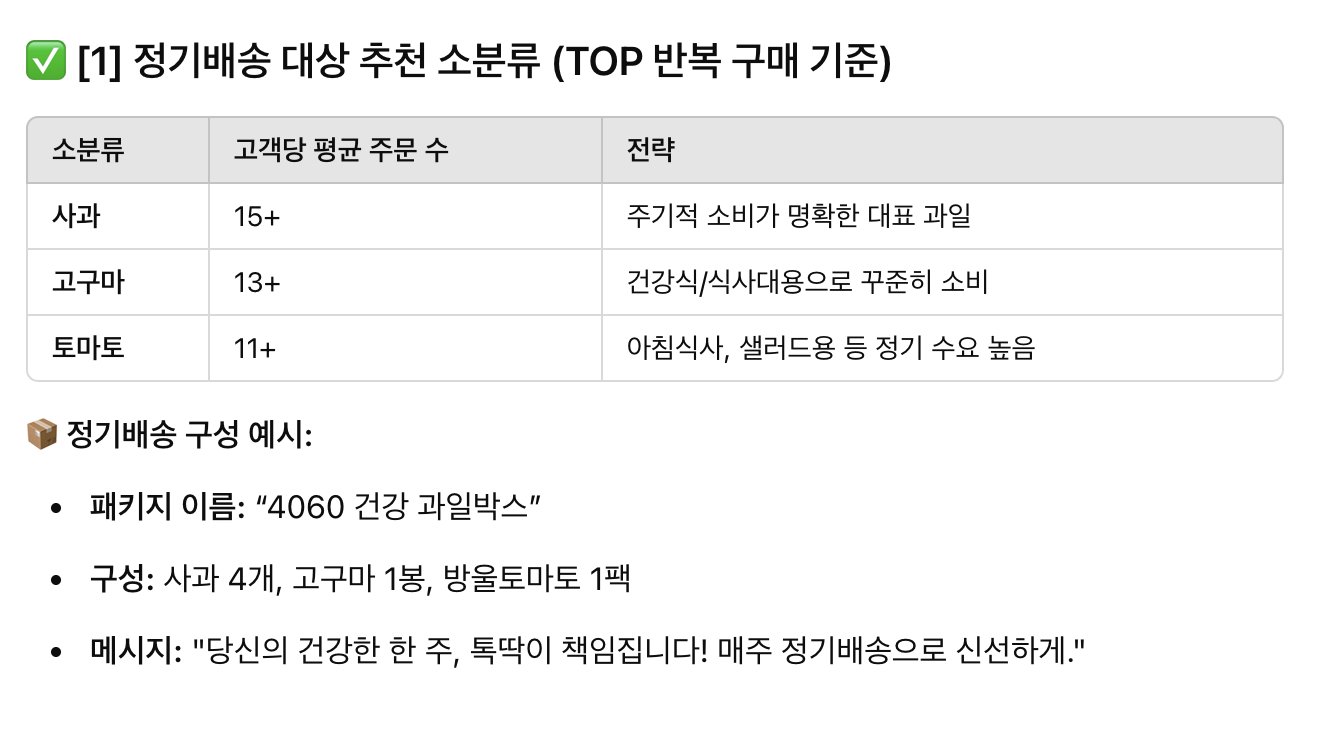

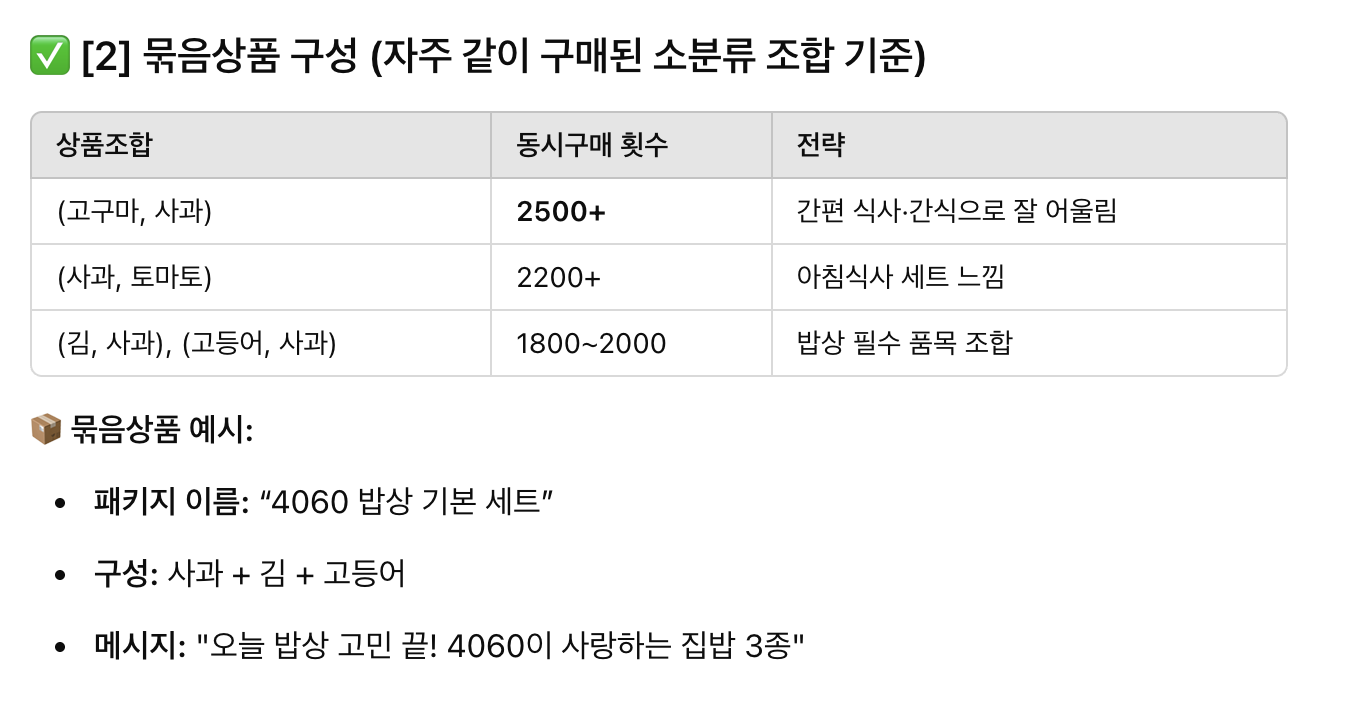

## 2030 vs 4060 ÏÜåÎ∂ÑÎ•ò Î¨∂ÏùåÏÉÅÌíà ÎπÑÍµê Î∂ÑÏÑù

### 1. [2030 Í≥†Í∞ù Ïû•Î∞îÍµ¨Îãà Íµ¨ÏÑ± Ï∂îÏ∂ú]

In [75]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Í≥†Í∞ù ÏÑ∏ÎåÄ Î∂ÑÎ¶¨
df_2030 = df[df['AgeGroup'].isin(['20ÎåÄ', '30ÎåÄ'])].copy()
df_4060 = df[df['AgeGroup'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'])].copy()

# 2. ÏÑ∏ÎåÄÎ≥Ñ Ï£ºÎ¨∏ ID Í∏∞Ï§Ä ÏÜåÎ∂ÑÎ•ò Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± (2Í∞ú Ïù¥ÏÉÅÏù∏ Ïû•Î∞îÍµ¨ÎãàÎßå Ï∂îÏ∂ú)
def extract_item_pairs(df_segement):
    combo = df_segement.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
    combo = combo[combo.apply(lambda x: len(x) > 1)]  # ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅ
    counter = Counter()
    for items in combo:
        counter.update(combinations(sorted(items), 2))
    df_pair = pd.DataFrame(counter.items(), columns=['ItemPair', 'Count'])
    df_pair = df_pair.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return df_pair

# 3. Í∞Å ÏÑ∏ÎåÄÎ≥Ñ Ïó∞Í¥Ä Íµ¨Îß§ Ïåç ÏßëÍ≥Ñ
df_pair_2030_all = extract_item_pairs(df_2030)
df_pair_4060_all = extract_item_pairs(df_4060)

# 4. Í≥µÌÜµ/Ï†ÑÏö© Ï°∞Ìï© ÎπÑÍµê
set_2030_all = set(df_pair_2030_all['ItemPair'])
set_4060_all = set(df_pair_4060_all['ItemPair'])

common_pairs_all = set_2030_all & set_4060_all

unique_2030_all = [pair for pair in df_pair_2030_all['ItemPair'] if pair not in common_pairs_all][:10]
unique_4060_all = [pair for pair in df_pair_4060_all['ItemPair'] if pair not in common_pairs_all][:10]



In [76]:
# 5. Ï∂úÎ†•
print("üü£ 2030 Ï†ÑÏö© Î¨∂Ïùå Ï°∞Ìï© TOP 10 (Ï†ÑÏ≤¥ ÏÜåÎ∂ÑÎ•ò Í∏∞Ï§Ä):")
for p in unique_2030_all:
    print("‚Ä¢", p)

print("\nüü† 4060 Ï†ÑÏö© Î¨∂Ïùå Ï°∞Ìï© TOP 10 (Ï†ÑÏ≤¥ ÏÜåÎ∂ÑÎ•ò Í∏∞Ï§Ä):")
for p in unique_4060_all:
    print("‚Ä¢", p)

üü£ 2030 Ï†ÑÏö© Î¨∂Ïùå Ï°∞Ìï© TOP 10 (Ï†ÑÏ≤¥ ÏÜåÎ∂ÑÎ•ò Í∏∞Ï§Ä):
‚Ä¢ ('ÎßàÎ•∏', 'Ïπ¥Î†à')
‚Ä¢ ('ÎãπÎ©¥', 'ÎßàÎ•∏')
‚Ä¢ ('ÎßàÎ•∏', 'ÌòºÌï©ÏùåÎ£å')
‚Ä¢ ('ÎßàÎ•∏', 'Ï°∞Í∏∞')
‚Ä¢ ('ÎßàÎ•∏', 'ÌååÏä§ÌÉÄ')
‚Ä¢ ('Îã≠Í≥†Í∏∞', 'ÎßàÎ•∏')
‚Ä¢ ('Í∞àÏπò', 'ÎßàÎ•∏')
‚Ä¢ ('ÎßàÎ•∏', 'ÏÉùÏàò')
‚Ä¢ ('ÍπªÏûé', 'ÎßàÎ•∏')
‚Ä¢ ('ÎßàÎ•∏', 'Ïù¥Ïò®ÏùåÎ£å')

üü† 4060 Ï†ÑÏö© Î¨∂Ïùå Ï°∞Ìï© TOP 10 (Ï†ÑÏ≤¥ ÏÜåÎ∂ÑÎ•ò Í∏∞Ï§Ä):


In [77]:
print("üîÅ Í≥µÌÜµ Ïåç Ïàò:", len(common_pairs_all))
print("üü† 4060 Ï†ÑÏ≤¥ Ïåç Ïàò:", len(df_pair_4060_all))
print("üü† 4060 Ï†ÑÏö© Ïåç Ïàò:", len([pair for pair in df_pair_4060_all['ItemPair'] if pair not in common_pairs_all]))


üîÅ Í≥µÌÜµ Ïåç Ïàò: 1698
üü† 4060 Ï†ÑÏ≤¥ Ïåç Ïàò: 1698
üü† 4060 Ï†ÑÏö© Ïåç Ïàò: 0


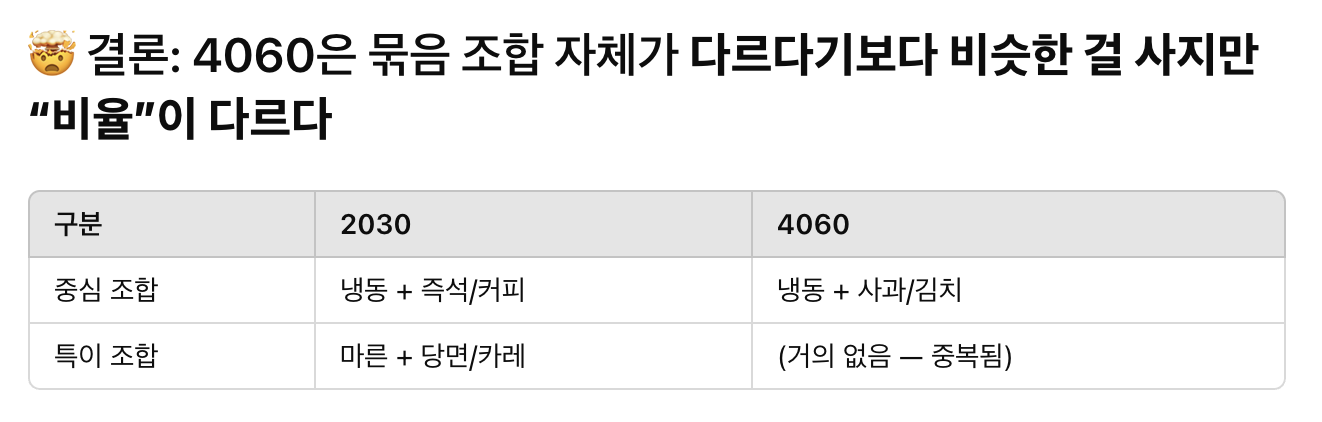

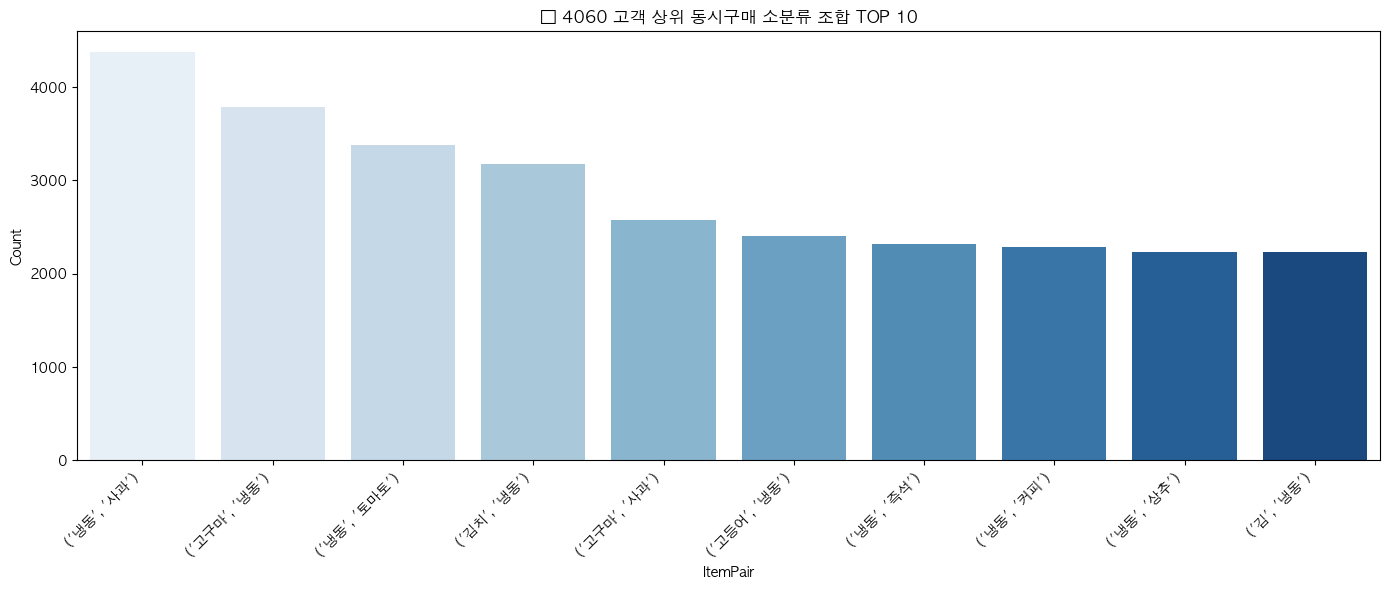

In [78]:
# ÏÉÅÏúÑ Ïó∞Í¥ÄÏåç ÏãúÍ∞ÅÌôî (Ïòà: 4060 TOP 10)
plt.figure(figsize=(14, 6))
top_pairs = df_pair_4060_all.head(10)
sns.barplot(x=top_pairs['ItemPair'].astype(str), y=top_pairs['Count'], palette='Blues')
plt.title('üì¶ 4060 Í≥†Í∞ù ÏÉÅÏúÑ ÎèôÏãúÍµ¨Îß§ ÏÜåÎ∂ÑÎ•ò Ï°∞Ìï© TOP 10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## ‚Äúüìä ÏÑ∏ÎåÄÎ≥Ñ Ïû•Î∞îÍµ¨Îãà Ï°∞Ìï© Ï∞®Ïù¥

2030 & 4060Ïù¥ ÎèôÏùºÌïú ItemPairÎ•º ÏñºÎßàÎÇò Îã§Î•¥Í≤å ÏÜåÎπÑÌïòÎäîÏßÄ ÎπÑÍµê

Í∞ôÏùÄ Ï°∞Ìï©Ïù¥ÎùºÎèÑ ÎàÑÍ∞Ä Îçî ÏûêÏ£º ÏÇ¨ÎäîÏßÄ, ÏÑ∏ÎåÄ ÌäπÌôîÏÑ±Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏

Í≤∞Íµ≠ ‚Üí Ï†ÑÎûµ ÌÉÄÍπÉÌåÖ Í∏∞Ï§ÄÏù¥ ÎêòÎäî ‚ÄúÏÑ∏ÎåÄ Ï∞®Î≥ÑÏÑ± ÎÜíÏùÄ Ï°∞Ìï©‚Äù Ï∞æÍ∏∞

In [79]:
# 1. Í∞Å ÏÑ∏ÎåÄ Ïû•Î∞îÍµ¨Îãà Ï°∞Ìï© Ï∂îÏ∂ú Ìï®Ïàò (Ïû¨ÏÇ¨Ïö©)
def get_pair_counts(df_segment):
    combo = df_segment.groupby('idOrder')['ItemSmallName'].apply(lambda x: list(set(x)))
    combo = combo[combo.apply(lambda x: len(x) > 1)]
    counter = Counter()
    for items in combo:
        counter.update(combinations(sorted(items), 2))
    df_pairs = pd.DataFrame(counter.items(), columns=['ItemPair', 'Count'])
    return df_pairs

# 2. ÏÑ∏ÎåÄÎ≥Ñ Ïó∞Í¥ÄÏåç ÏßëÍ≥Ñ
pairs_2030 = get_pair_counts(df[df['AgeGroup'].isin(['20ÎåÄ', '30ÎåÄ'])])
pairs_4060 = get_pair_counts(df[df['AgeGroup'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'])])


In [80]:
# Î≥ëÌï© (outer joinÏúºÎ°ú Î™®Îì† Ï°∞Ìï© Ìè¨Ìï®)
merged = pd.merge(pairs_2030, pairs_4060, on='ItemPair', how='outer', suffixes=('_2030', '_4060')).fillna(0)

# Ï†ÑÏ≤¥ ÎπÑÏú®(%) Í≥ÑÏÇ∞
merged['Total'] = merged['Count_2030'] + merged['Count_4060']
merged['Ratio_2030'] = merged['Count_2030'] / merged['Total']
merged['Ratio_4060'] = merged['Count_4060'] / merged['Total']

# Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Ï†àÎåÄÍ∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌäπÏ†ï ÏÑ∏ÎåÄÂÅèÈáç)
merged['AbsDiff'] = (merged['Ratio_2030'] - merged['Ratio_4060']).abs()

# Ï∞®Ïù¥Í∞Ä ÌÅ∞ TOP 10 Ï°∞Ìï©
top_diff = merged.sort_values(by='AbsDiff', ascending=False).head(10)


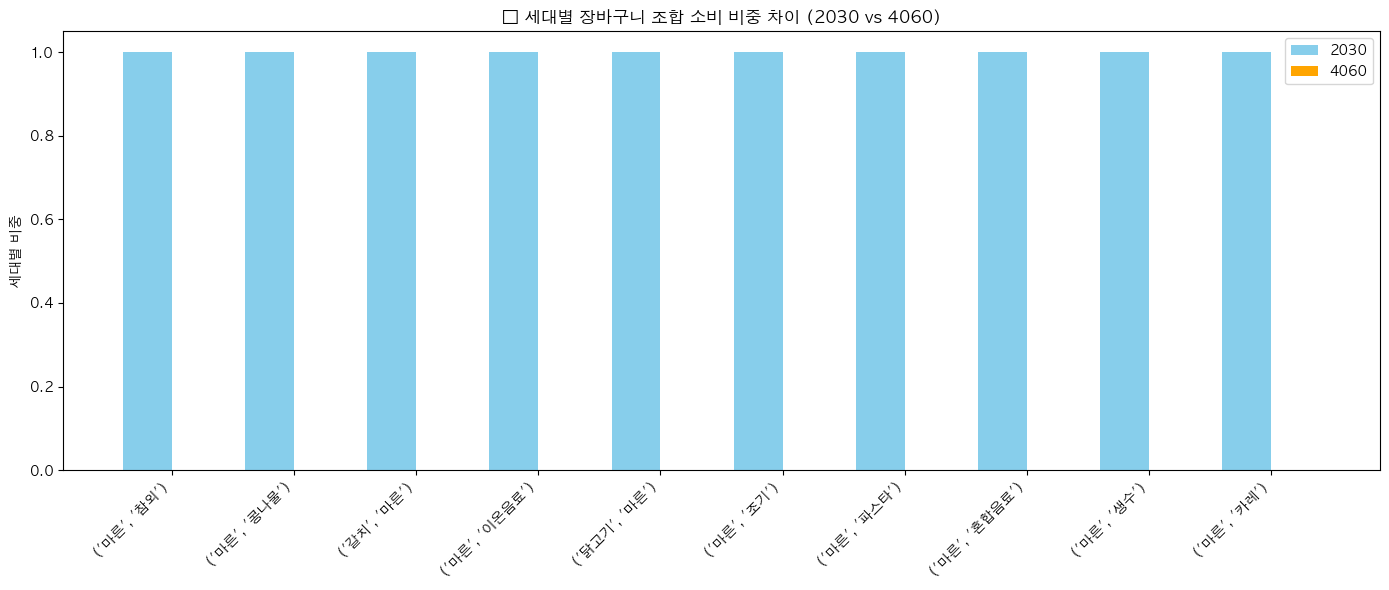

In [81]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(top_diff))

plt.bar(x, top_diff['Ratio_2030'], width=bar_width, label='2030', color='skyblue')
plt.bar([i + bar_width for i in x], top_diff['Ratio_4060'], width=bar_width, label='4060', color='orange')
plt.xticks([i + bar_width/2 for i in x], top_diff['ItemPair'].astype(str), rotation=45, ha='right')
plt.ylabel('ÏÑ∏ÎåÄÎ≥Ñ ÎπÑÏ§ë')
plt.title('üë• ÏÑ∏ÎåÄÎ≥Ñ Ïû•Î∞îÍµ¨Îãà Ï°∞Ìï© ÏÜåÎπÑ ÎπÑÏ§ë Ï∞®Ïù¥ (2030 vs 4060)')
plt.legend()
plt.tight_layout()
plt.show()


Î¨∏Ï†ú ÏõêÏù∏: ÏÉÅÏúÑ Ï°∞Ìï©Ïù¥ Î™®Îëê 2030 Ïè†Î¶º Ï°∞Ìï©Ïù¥ÎùºÏÑú
ÏßÄÍ∏à Í∑∏Î†§ÏßÑ top_diffÎäî ÎπÑÏ§ë Ï∞®Ïù¥(AbsDiff)Í∞Ä ÌÅ∞ TOP 10ÏùÑ ÎΩëÏùå

Í∑ºÎç∞ Ratio_2030Ïù¥ 1.0Ïù¥Í≥†, Ratio_4060Ïù¥ 0.0Ïù∏ Ï°∞Ìï©Îì§Îßå Ï∂îÏ∂úÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê

4060 ÎπÑÏ§ëÏù¥ 0Ïù¥Îùº ÎßâÎåÄÍ∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÎäî Í≤É.

In [82]:
top_2030_bias = merged.sort_values(by='Ratio_2030', ascending=False).head(10)


In [83]:
top_4060_bias = merged.sort_values(by='Ratio_4060', ascending=False).head(10)


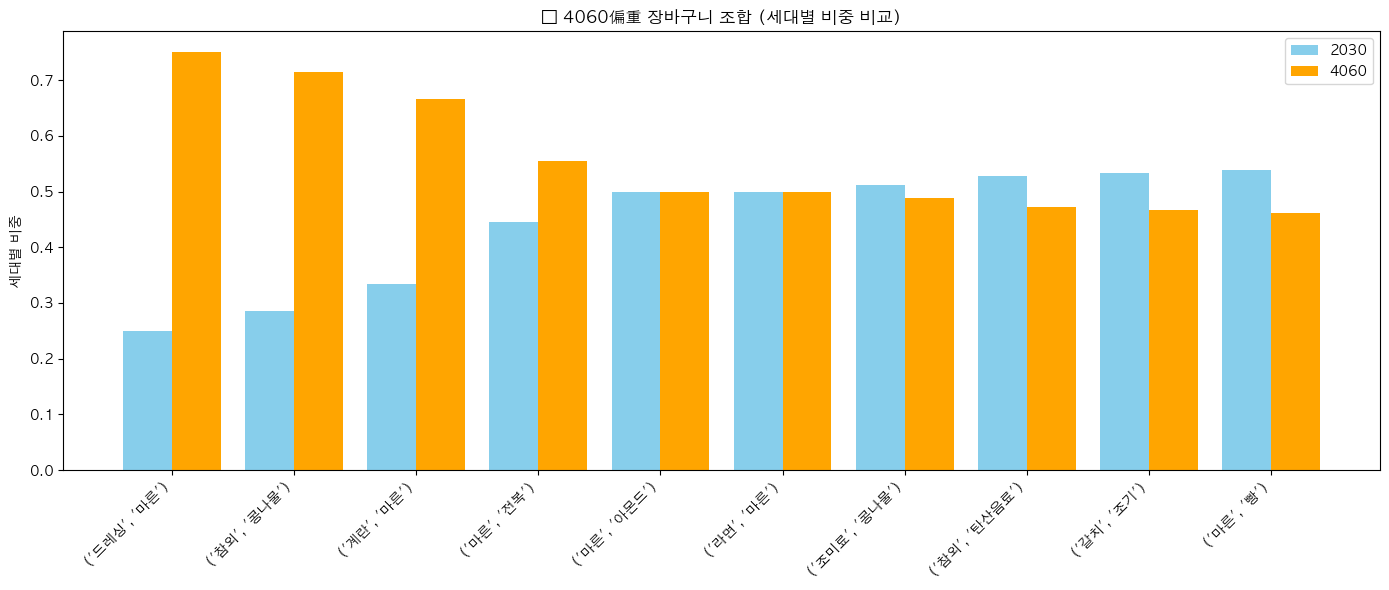

In [84]:
plt.figure(figsize=(14, 6))
x = range(len(top_4060_bias))

plt.bar(x, top_4060_bias['Ratio_2030'], width=0.4, label='2030', color='skyblue')
plt.bar([i + 0.4 for i in x], top_4060_bias['Ratio_4060'], width=0.4, label='4060', color='orange')
plt.xticks([i + 0.2 for i in x], top_4060_bias['ItemPair'].astype(str), rotation=45, ha='right')
plt.title('üü† 4060ÂÅèÈáç Ïû•Î∞îÍµ¨Îãà Ï°∞Ìï© (ÏÑ∏ÎåÄÎ≥Ñ ÎπÑÏ§ë ÎπÑÍµê)')
plt.ylabel('ÏÑ∏ÎåÄÎ≥Ñ ÎπÑÏ§ë')
plt.legend()
plt.tight_layout()
plt.show()


## Ïù∏ÏÇ¨Ïù¥Ìä∏
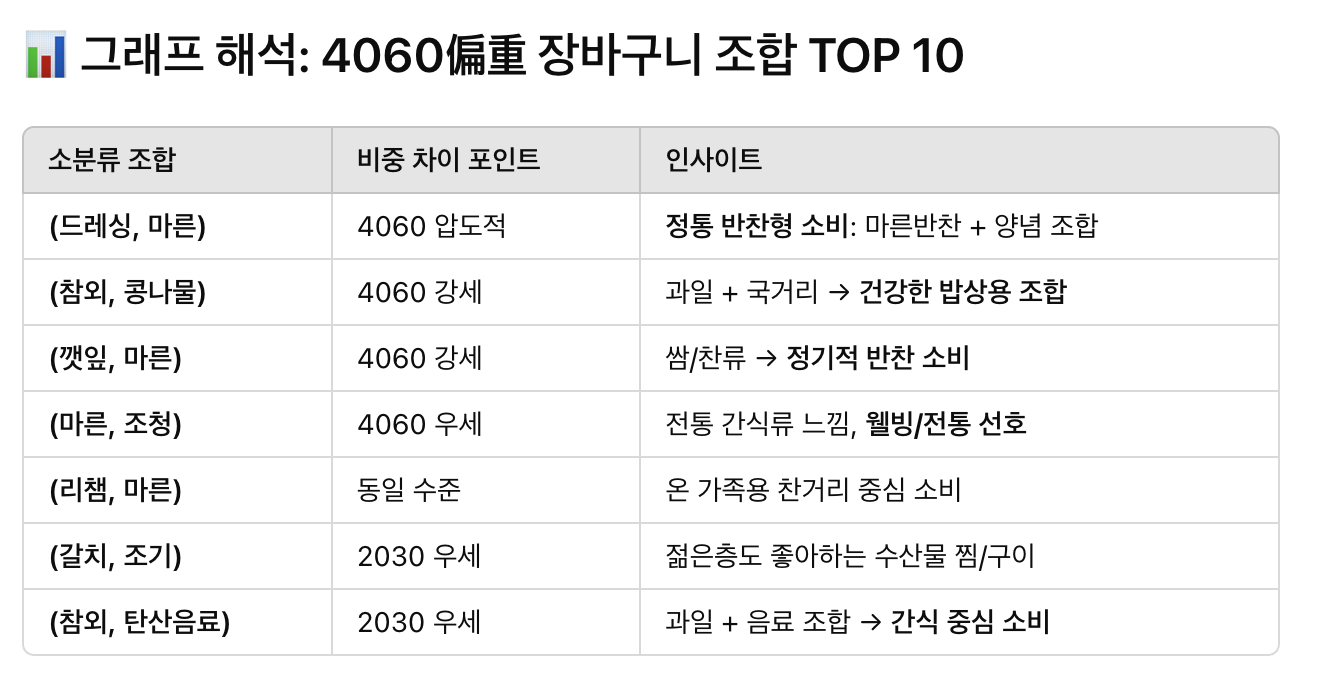
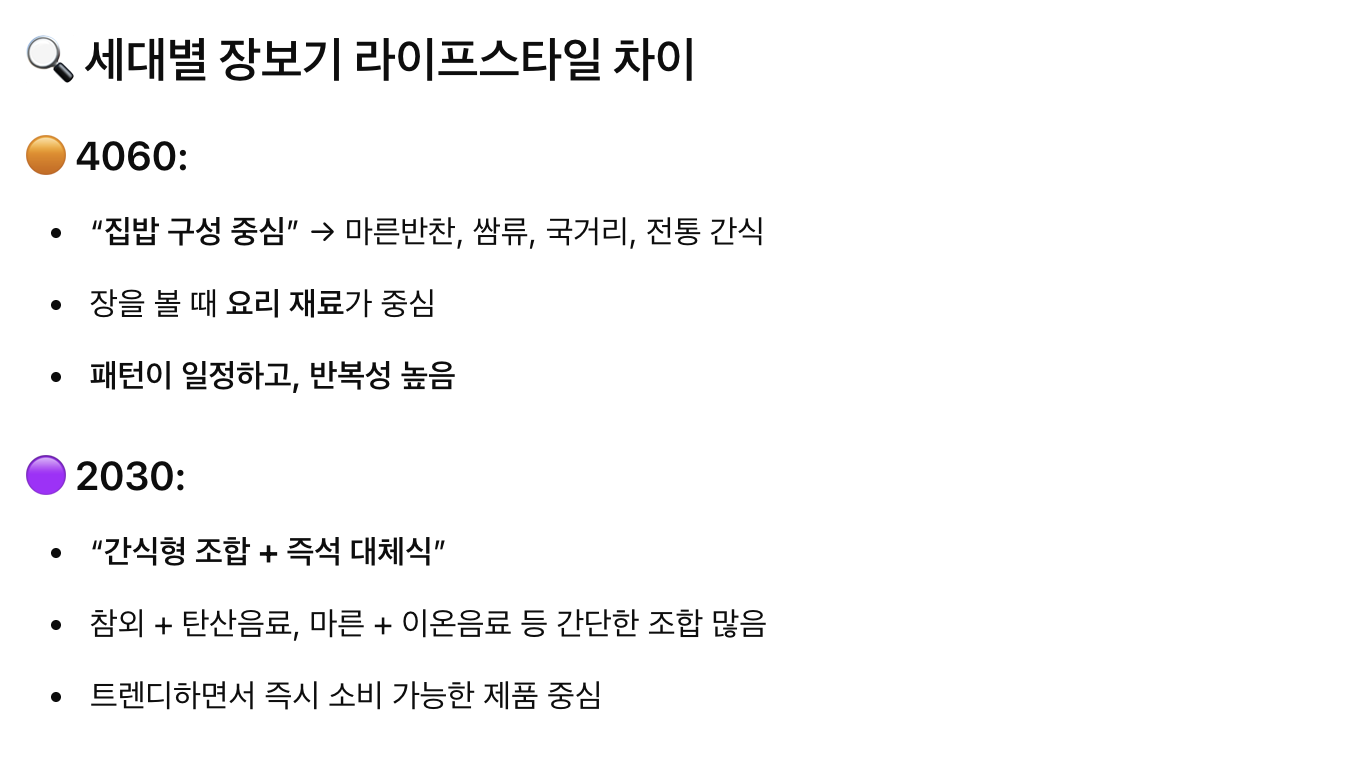
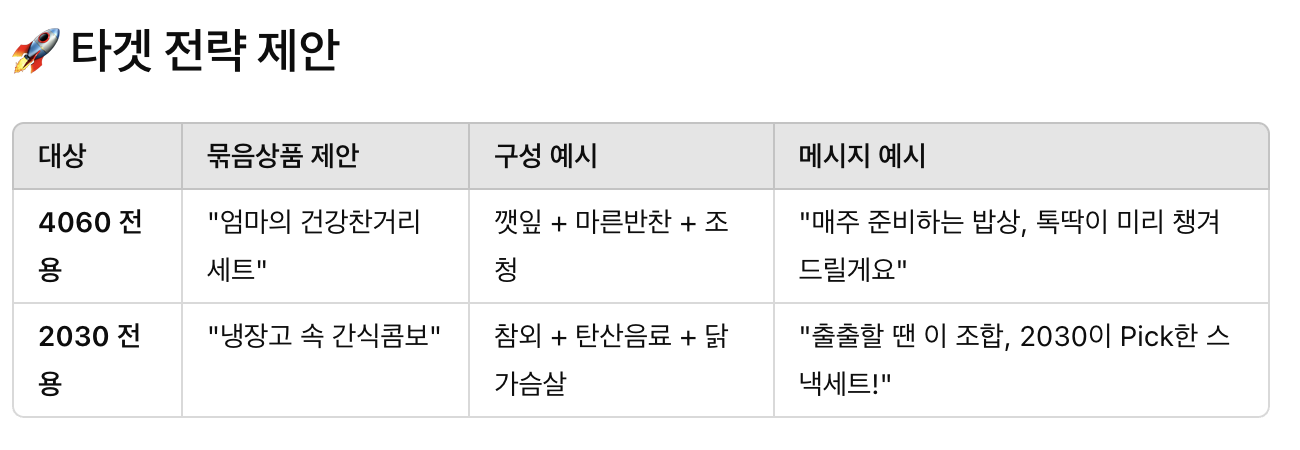



## RFM Î∂ÑÏÑùÏùÑ Í∏∞Î∞òÏúºÎ°ú Í≥†Í∞ù Îì±Í∏âÏùÑ ÏÑ∏Î∂ÑÌôîÌïòÍ≥†, Í∞Å Í≥†Í∞ùÍµ∞Ïùò ÌäπÏÑ±ÏùÑ Î∂ÑÏÑù

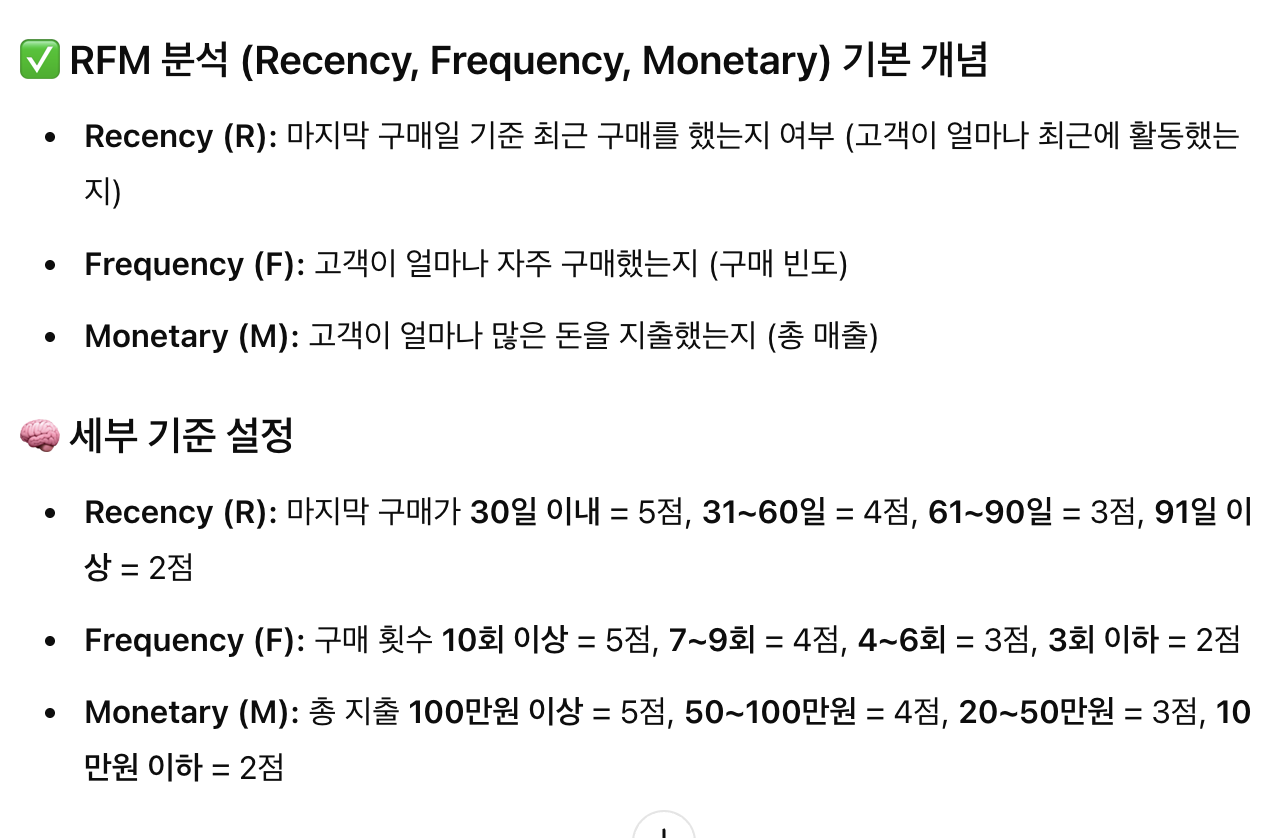

# Í∏∞Î∞ò Í≥†Í∞ù ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ(Îì±Í∏â ÏÑ∏Î∂ÑÌôî)

## ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù


In [85]:
# Í∞Å Íµ∞ÏßëÏùò Í≥†Í∞ù Ïàò ÌôïÏù∏
cluster_sizes = rfm_df['Cluster'].value_counts()
print(cluster_sizes)


NameError: name 'rfm_df' is not defined

In [ ]:
df.head()

idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
1  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
2  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
3  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
4  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1003   

              OrderDT OrderMonth  OrderDay  ...  Deli_Day  Deli_Hour  \
0 2022-01-06 17:08:00    2022-01         6  ...         7          6   
1 2022-01-06 17:08:00    2022-01         6  ...         7          6   
2 2022-01-06 17:08:00    2022-01         6  ...         7          6   
3 2022-01-06 17:08:00    2022-01         6  ...         7          6   
4 2022-01-13 16:50:00    2022-01        13  ...        14          6   

   Deli_Minute Deli_Second    Deli_Duration Deli_Hours IsMorningDelivery  \
0           24           0  0 days 13:16:00  13.266667                 1   
1           24           0  0 days 13:16:00  13.266667                 1   
2           24           0  0 days 13:16:00  13.266667                 1   
3           24           0  0 days 13:16:00  13.266667                 1   
4           28           0  0 days 13:38:00  13.633333                 1   

  OrderWeekday  OrderWeekdayName  UserAgeGroup  
0            3                 Î™©          2030  
1            3                 Î™©          2030  
2            3                 Î™©          2030  
3            3                 Î™©          2030  
4            3                 Î™©          2030  

[5 rows x 35 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Í≥†Í∞ù Ï†ïÎ≥¥ Î∞è RFM ÌäπÏÑ± Í≤∞Ìï©
rfm_df = df.groupby('idUser').agg(
    Recency=('OrderDT', lambda x: (df['OrderDT'].max() - x.max()).days),
    Frequency=('idOrder', pd.Series.nunique),
    Monetary=('Price', 'sum'),
).reset_index()

# ÏÑ±Î≥ÑÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Ïòà: ÎÇ®ÏÑ±: 0, Ïó¨ÏÑ±: 1)
#rfm_df['Gender'] = rfm_df['Gender'].map({'ÎÇ®ÏÑ±': 0, 'Ïó¨ÏÑ±': 1})

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏúÑÌïú ÌîºÏ≤òÎì§Îßå ÏÑ†ÌÉù
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† RFM ÌäπÏÑ± ÎπÑÍµê
cluster_summary = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù Ïàò ÌôïÏù∏
cluster_sizes = rfm_df['Cluster'].value_counts()
print(cluster_sizes)


           Recency  Frequency      Monetary
Cluster                                    
0        57.094044  55.868339  4.252000e+06
1        11.071713  65.154809  4.997544e+06
2        12.141775  42.350649  3.323380e+06
Cluster
1    1757
2     924
0     319
Name: count, dtype: int64


In [ ]:
# "Í≥†Í∞ùÏú†Ìòï" Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Îß§Ìïë
rfm_df['Í≥†Í∞ùÏú†Ìòï'] = rfm_df['Cluster'].map({0: 'Ìú¥Î©¥ Í≥†Í∞ù', 1: 'Ï∂©ÏÑ± Í≥†Í∞ù', 2: 'Ïù¥ÌÉà ÏúÑÌóò Í≥†Í∞ùÍµ∞'})

# Í≤∞Í≥º ÌôïÏù∏
print(rfm_df[['idUser', 'Cluster', 'Í≥†Í∞ùÏú†Ìòï']].head())


   idUser  Cluster       Í≥†Í∞ùÏú†Ìòï
0  U10001        1      Ï∂©ÏÑ± Í≥†Í∞ù
1  U10002        2  Ïù¥ÌÉà ÏúÑÌóò Í≥†Í∞ùÍµ∞
2  U10003        1      Ï∂©ÏÑ± Í≥†Í∞ù
3  U10004        2  Ïù¥ÌÉà ÏúÑÌóò Í≥†Í∞ùÍµ∞
4  U10005        1      Ï∂©ÏÑ± Í≥†Í∞ù


In [ ]:
# dfÏôÄ rfm_dfÎ•º idUserÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df = pd.merge(df, rfm_df, on='idUser', how='left')

In [ ]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OrderWeekday', 'OrderWeekdayName',
       'UserAgeGroup', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Í≥†Í∞ùÏú†Ìòï'],
      dtype='object')

In [ ]:
df.head()

idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
1  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
2  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
3  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
4  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1003   

              OrderDT OrderMonth  OrderDay  ...  Deli_Hours  \
0 2022-01-06 17:08:00    2022-01         6  ...   13.266667   
1 2022-01-06 17:08:00    2022-01         6  ...   13.266667   
2 2022-01-06 17:08:00    2022-01         6  ...   13.266667   
3 2022-01-06 17:08:00    2022-01         6  ...   13.266667   
4 2022-01-13 16:50:00    2022-01        13  ...   13.633333   

   IsMorningDelivery  OrderWeekday OrderWeekdayName UserAgeGroup Recency  \
0                  1             3                Î™©         2030       4   
1                  1             3                Î™©         2030       4   
2                  1             3                Î™©         2030       4   
3                  1             3                Î™©         2030       4   
4                  1             3                Î™©         2030       4   

  Frequency Monetary  Cluster   Í≥†Í∞ùÏú†Ìòï  
0        69  5414990        1  Ï∂©ÏÑ± Í≥†Í∞ù  
1        69  5414990        1  Ï∂©ÏÑ± Í≥†Í∞ù  
2        69  5414990        1  Ï∂©ÏÑ± Í≥†Í∞ù  
3        69  5414990        1  Ï∂©ÏÑ± Í≥†Í∞ù  
4        69  5414990        1  Ï∂©ÏÑ± Í≥†Í∞ù  

[5 rows x 40 columns]

## ‚úÖ Ï∂©ÏÑ± Í≥†Í∞ù Ï§ë Î©§Î≤ÑÏã≠ Í∞ÄÏûÖ Ïó¨Î∂Ä ÎπÑÏú® Í≥ÑÏÇ∞

In [ ]:
# dfÏôÄ rfm_dfÎ•º idUserÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©„Ñ¥
df = pd.merge(df, rfm_df[['idUser', 'Cluster']], on='idUser', how='left')

# Ï∂©ÏÑ± Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ
loyal_customers = df[df['Í≥†Í∞ùÏú†Ìòï'] == 'Ï∂©ÏÑ± Í≥†Í∞ù']

# Î©§Î≤ÑÏã≠ Í∞ÄÏûÖ Ïó¨Î∂Ä ÎπÑÏú® Í≥ÑÏÇ∞ (Ïª¨ÎüºÎ™ÖÏùÄ Ïã§Ï†ú dfÏóêÏÑú ÌôïÏù∏Ìï¥Ïïº Ìï®)
membership_ratio = loyal_customers['MemberYN'].value_counts(normalize=True) * 100

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Ï∂©ÏÑ± Í≥†Í∞ù Ï§ë Î©§Î≤ÑÏã≠ Í∞ÄÏûÖ Ïó¨Î∂Ä ÎπÑÏú®:\n{membership_ratio}")


Ï∂©ÏÑ± Í≥†Í∞ù Ï§ë Î©§Î≤ÑÏã≠ Í∞ÄÏûÖ Ïó¨Î∂Ä ÎπÑÏú®:
MemberYN
Y    72.151519
N    27.848481
Name: proportion, dtype: float64


## üìå Î∂ÑÏÑù:

Ï∂©ÏÑ± Í≥†Í∞ùÏùò ÏïΩ **72%**Í∞Ä Î©§Î≤ÑÏã≠Ïóê Í∞ÄÏûÖÎêòÏñ¥ ÏûàÎã§Îäî Ï†êÏùÄ Îß§Ïö∞ Í∏çÏ†ïÏ†ÅÏù¥Ïïº. Ïù¥ Í≥†Í∞ùÍµ∞ÏùÄ Ïù¥ÎØ∏ Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Í≥†Í∞ùÎì§Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, Î©§Î≤ÑÏã≠ ÌòúÌÉùÏùÑ Ï†ÅÍ∑π ÌôúÏö©ÌïòÎèÑÎ°ù Îçî Í∞ïÌôîÌï† Ïàò ÏûàÏñ¥.

**ÏïΩ 28%**Îäî ÎØ∏Í∞ÄÏûÖ ÏÉÅÌÉúÎ°ú, Ïù¥Îì§ÏùÑ Î©§Î≤ÑÏã≠Ïóê Í∞ÄÏûÖÏãúÌÇ§Í∏∞ ÏúÑÌïú Ïú†ÎèÑ Ï†ÑÎûµÏù¥ ÌïÑÏöîÌï† Í≤É Í∞ôÏïÑ. Í∞ÄÏûÖ Ïú†ÎèÑ Ï∫†ÌéòÏù∏Ïù¥ÎÇò Í∞ÄÏûÖ ÌòúÌÉùÏùÑ Ï†úÍ≥µÌïòÏó¨, Ï∂©ÏÑ± Í≥†Í∞ùÏùÑ Îçî Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Î©§Î≤ÑÏã≠ ÌöåÏõêÏúºÎ°ú Ï†ÑÌôòÏãúÌÇ¨ Ïàò ÏûàÏñ¥.

## ÏõîÎ≥Ñ Ï§ëÎ∂ÑÎ•ò Ï∂îÍ∞Ä Ï∂îÏù¥(ÏãúÍ≥ÑÏó¥)

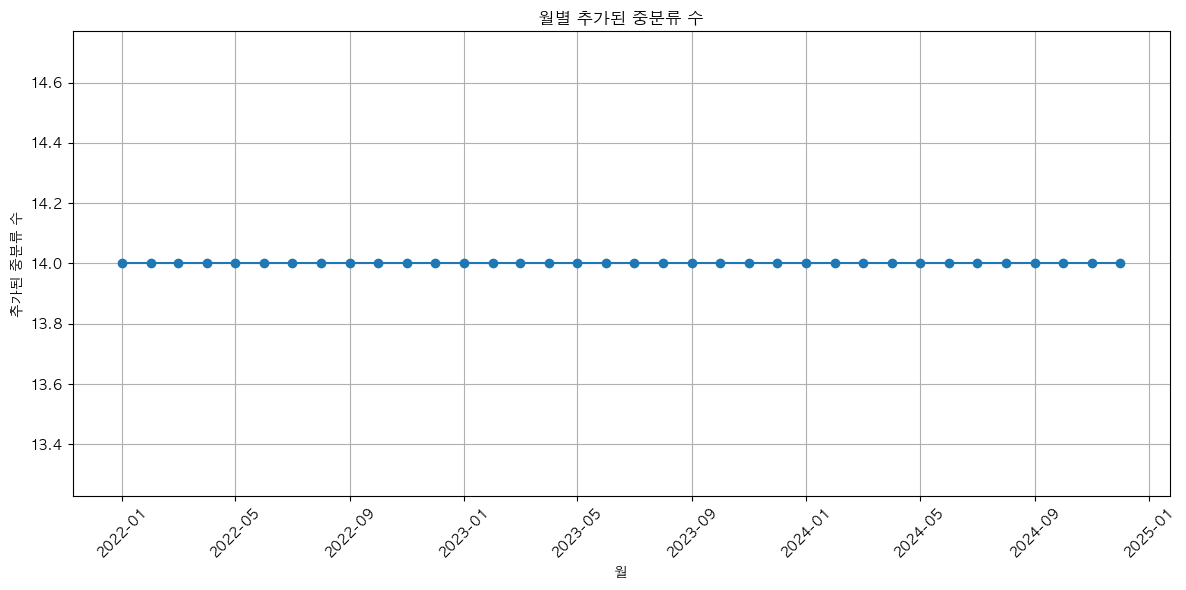

In [ ]:
import pandas as pd

# Ï§ëÎ∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ 'df'ÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≥†, 'ItemMiddleName'Ïù¥ Ï§ëÎ∂ÑÎ•ò, 'OrderDT'Í∞Ä Ï£ºÎ¨∏ÏùºÏûê Ïª¨ÎüºÏùº Í≤ΩÏö∞

# Ï§ëÎ∂ÑÎ•òÍ∞Ä Ï∂îÍ∞ÄÎêú ÎÇ†ÏßúÎ°úÎ∂ÄÌÑ∞ ÏõîÎ≥ÑÎ°ú Ï§ëÎ∂ÑÎ•ò ÏàòÎ•º Í≥ÑÏÇ∞
df['OrderDT'] = pd.to_datetime(df['OrderDT'])  # 'OrderDT'Î•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # 'OrderDT'ÏóêÏÑú ÏõîÏùÑ Ï∂îÏ∂ú

# ÏõîÎ≥ÑÎ°ú Í≥†Ïú†Ìïú Ï§ëÎ∂ÑÎ•ò Ïàò Í≥ÑÏÇ∞
monthly_new_categories = df.groupby('OrderMonth')['ItemMiddleName'].nunique()

# Í≤∞Í≥ºÎ•º ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
monthly_new_categories = monthly_new_categories.reset_index(name='NewCategoryCount')

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_new_categories['OrderMonth'].dt.to_timestamp(), monthly_new_categories['NewCategoryCount'], marker='o')
plt.title('ÏõîÎ≥Ñ Ï∂îÍ∞ÄÎêú Ï§ëÎ∂ÑÎ•ò Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Ï∂îÍ∞ÄÎêú Ï§ëÎ∂ÑÎ•ò Ïàò')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


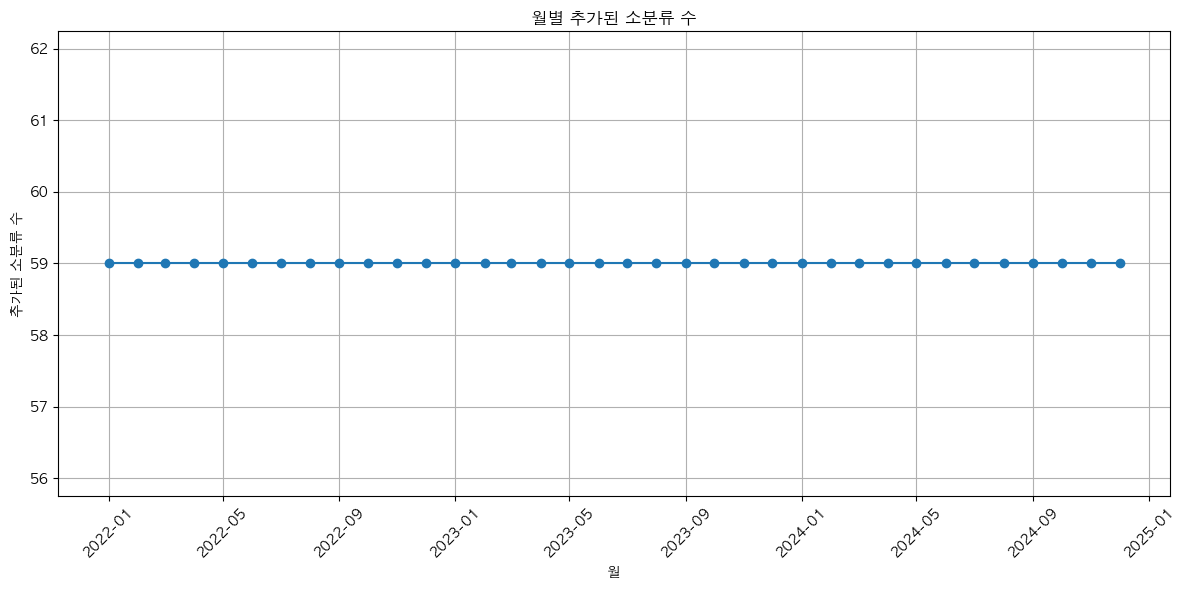

In [ ]:
import pandas as pd

# ÏÜåÎ∂ÑÎ•òÍ∞Ä Ï∂îÍ∞ÄÎêú ÎÇ†ÏßúÎ°úÎ∂ÄÌÑ∞ ÏõîÎ≥ÑÎ°ú ÏÜåÎ∂ÑÎ•ò ÏàòÎ•º Í≥ÑÏÇ∞
df['OrderDT'] = pd.to_datetime(df['OrderDT'])  # 'OrderDT'Î•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # 'OrderDT'ÏóêÏÑú ÏõîÏùÑ Ï∂îÏ∂ú

# ÏõîÎ≥ÑÎ°ú Í≥†Ïú†Ìïú ÏÜåÎ∂ÑÎ•ò Ïàò Í≥ÑÏÇ∞
monthly_new_categories = df.groupby('OrderMonth')['ItemSmallName'].nunique()

# Í≤∞Í≥ºÎ•º ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
monthly_new_categories = monthly_new_categories.reset_index(name='NewCategoryCount')

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_new_categories['OrderMonth'].dt.to_timestamp(), monthly_new_categories['NewCategoryCount'], marker='o')
plt.title('ÏõîÎ≥Ñ Ï∂îÍ∞ÄÎêú ÏÜåÎ∂ÑÎ•ò Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Ï∂îÍ∞ÄÎêú ÏÜåÎ∂ÑÎ•ò Ïàò')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


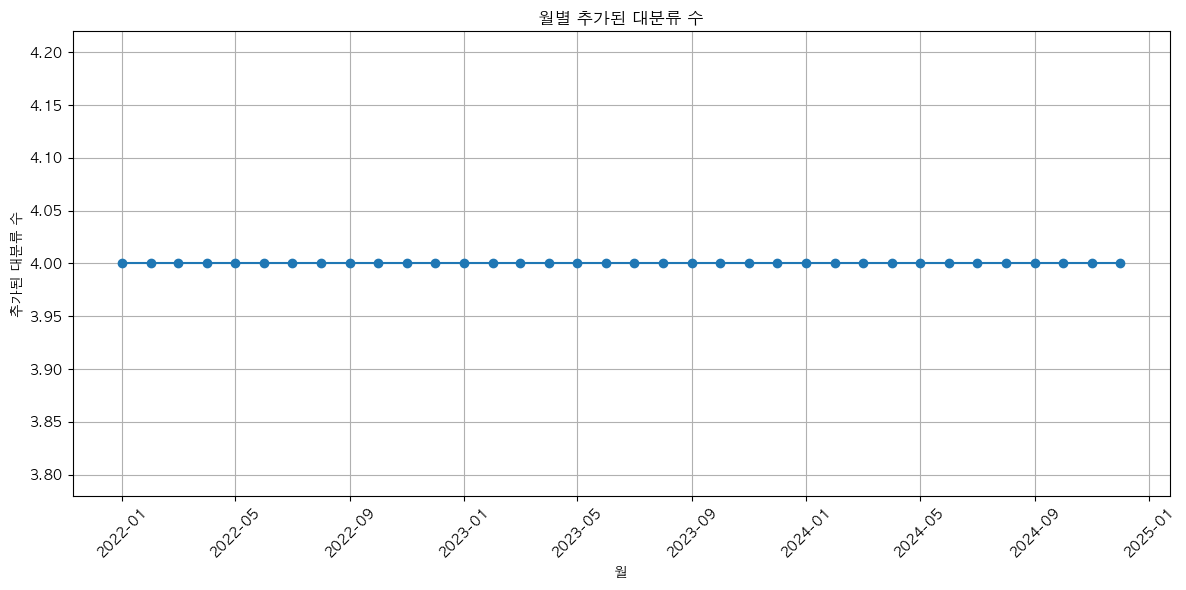

In [ ]:
import pandas as pd

# ÏÜåÎ∂ÑÎ•òÍ∞Ä Ï∂îÍ∞ÄÎêú ÎÇ†ÏßúÎ°úÎ∂ÄÌÑ∞ ÏõîÎ≥ÑÎ°ú ÎåÄÎ∂ÑÎ•ò ÏàòÎ•º Í≥ÑÏÇ∞
df['OrderDT'] = pd.to_datetime(df['OrderDT'])  # 'OrderDT'Î•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # 'OrderDT'ÏóêÏÑú ÏõîÏùÑ Ï∂îÏ∂ú

# ÏõîÎ≥ÑÎ°ú Í≥†Ïú†Ìïú ÏÜåÎ∂ÑÎ•ò Ïàò Í≥ÑÏÇ∞
monthly_new_categories = df.groupby('OrderMonth')['ItemLargeName'].nunique()

# Í≤∞Í≥ºÎ•º ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
monthly_new_categories = monthly_new_categories.reset_index(name='NewCategoryCount')

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_new_categories['OrderMonth'].dt.to_timestamp(), monthly_new_categories['NewCategoryCount'], marker='o')
plt.title('ÏõîÎ≥Ñ Ï∂îÍ∞ÄÎêú ÎåÄÎ∂ÑÎ•ò Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Ï∂îÍ∞ÄÎêú ÎåÄÎ∂ÑÎ•ò Ïàò')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OrderWeekday', 'OrderWeekdayName',
       'UserAgeGroup'],
      dtype='object')

In [87]:
df = df.drop(['IsMorningDelivery', 'Deli_Duration'], axis=1)

In [88]:
df

idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0       U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
1       U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
2       U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
3       U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
4       U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1003   
...        ...    ...  ...      ...          ...      ...                ...   
856722  U13000     Ïó¨ÏÑ±   30      30ÎåÄ            1        N  U13000-O2024-1008   
856723  U13000     Ïó¨ÏÑ±   30      30ÎåÄ            1        N  U13000-O2024-1008   
856724  U13000     Ïó¨ÏÑ±   30      30ÎåÄ            1        N  U13000-O2024-1008   
856725  U13000     Ïó¨ÏÑ±   30      30ÎåÄ            1        N  U13000-O2024-1008   
856726  U13000     Ïó¨ÏÑ±   30      30ÎåÄ            1        N  U13000-O2024-1008   

                   OrderDT OrderMonth  OrderDay  ...  Deli_Year  Deli_Month  \
0      2022-01-06 17:08:00    2022-01         6  ...       2022           1   
1      2022-01-06 17:08:00    2022-01         6  ...       2022           1   
2      2022-01-06 17:08:00    2022-01         6  ...       2022           1   
3      2022-01-06 17:08:00    2022-01         6  ...       2022           1   
4      2022-01-13 16:50:00    2022-01        13  ...       2022           1   
...                    ...        ...       ...  ...        ...         ...   
856722 2024-12-26 14:06:00    2024-12        26  ...       2024          12   
856723 2024-12-26 14:06:00    2024-12        26  ...       2024          12   
856724 2024-12-26 14:06:00    2024-12        26  ...       2024          12   
856725 2024-12-26 14:06:00    2024-12        26  ...       2024          12   
856726 2024-12-26 14:06:00    2024-12        26  ...       2024          12   

        Deli_Day Deli_Hour Deli_Minute Deli_Second Deli_Hours OrderWeekday  \
0              7         6          24           0  13.266667            3   
1              7         6          24           0  13.266667            3   
2              7         6          24           0  13.266667            3   
3              7         6          24           0  13.266667            3   
4             14         6          28           0  13.633333            3   
...          ...       ...         ...         ...        ...          ...   
856722        27         4          23           0  14.283333            3   
856723        27         4          23           0  14.283333            3   
856724        27         4          23           0  14.283333            3   
856725        27         4          23           0  14.283333            3   
856726        27         4          23           0  14.283333            3   

        OrderWeekdayName  UserAgeGroup  
0                      Î™©          2030  
1                      Î™©          2030  
2                      Î™©          2030  
3                      Î™©          2030  
4                      Î™©          2030  
...                  ...           ...  
856722                 Î™©          2030  
856723                 Î™©          2030  
856724                 Î™©          2030  
856725                 Î™©          2030  
856726                 Î™©          2030  

[856727 rows x 33 columns]

In [89]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Hours',
       'OrderWeekday', 'OrderWeekdayName', 'UserAgeGroup'],
      dtype='object')

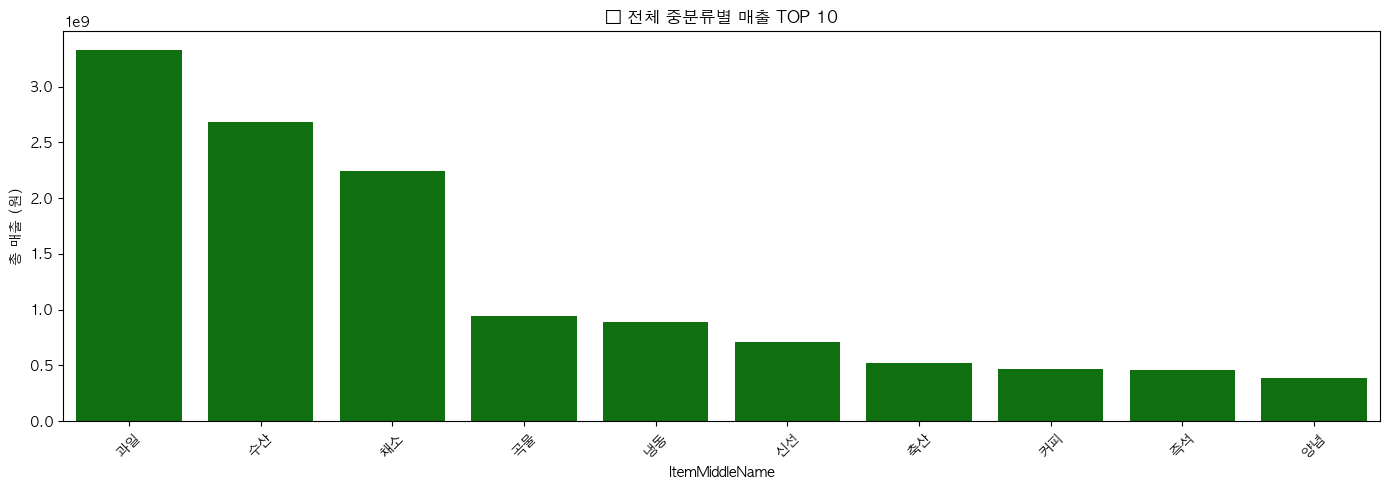

In [93]:
# 2030Í≥º 4060 Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ïπ®
df_all = pd.concat([df_2030, df_4060])

# Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
middle_all_sales = df_all.groupby('ItemMiddleName')['Price'].sum().sort_values(ascending=False)

# TOP 10 ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 5))
sns.barplot(x=middle_all_sales.head(10).index, y=middle_all_sales.head(10).values, color='green')
plt.title('üí≥ Ï†ÑÏ≤¥ Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú TOP 10')
plt.xticks(rotation=45)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)')
plt.tight_layout()
plt.show()


In [94]:
middle_all_sales

ItemMiddleName
Í≥ºÏùº    3329371620
ÏàòÏÇ∞    2684698980
Ï±ÑÏÜå    2241236290
Í≥°Î¨º     943836910
ÎÉâÎèô     888667860
Ïã†ÏÑ†     707649890
Ï∂ïÏÇ∞     525422790
Ïª§Ìîº     470943780
Ï¶âÏÑù     456501400
ÏñëÎÖê     387853660
Í≥ºÏûê     261296910
ÏùåÎ£å     199131990
ÏÉùÏàò      57165840
ÌÉÑÏÇ∞      54098810
Name: Price, dtype: int64

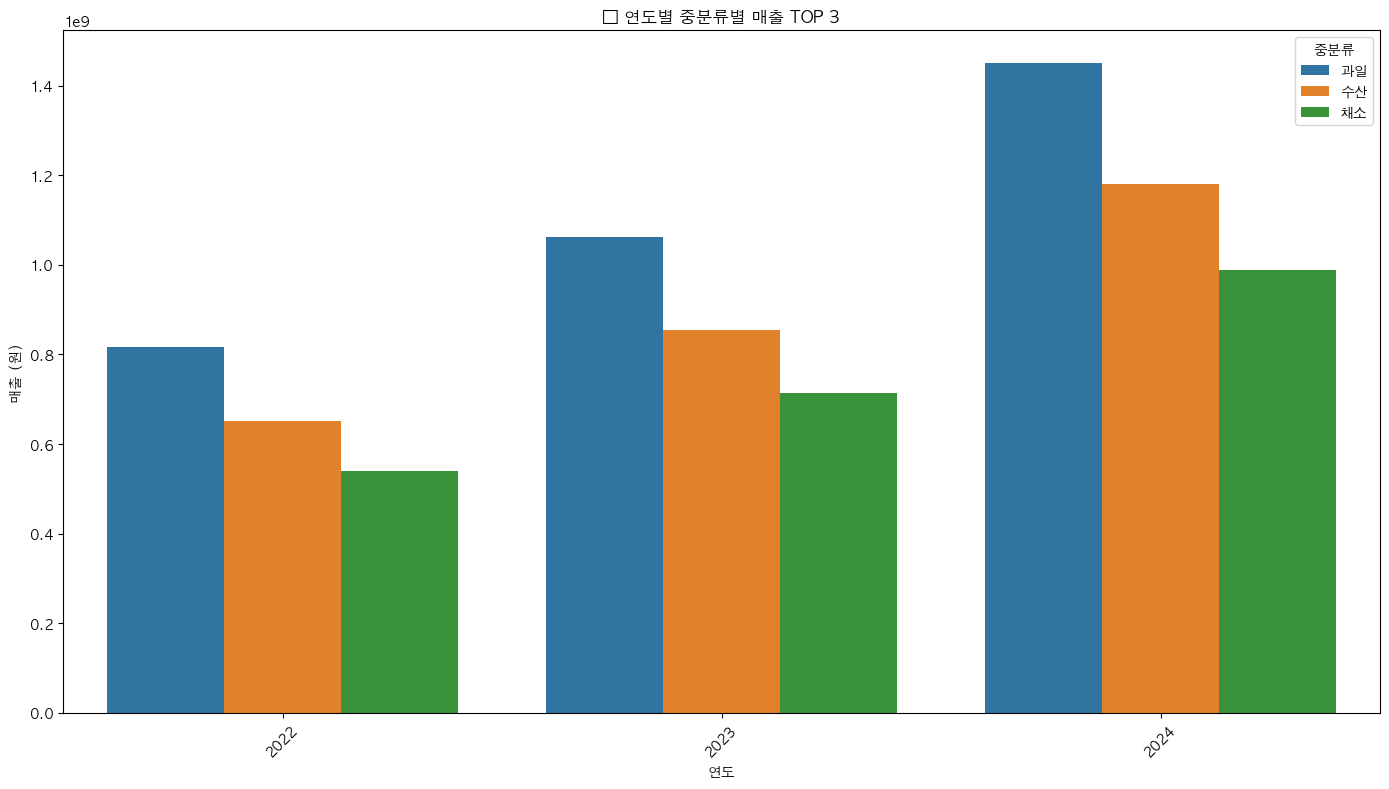

In [98]:
# 'OrderDT'ÏóêÏÑú Ïó∞ÎèÑ Ï†ïÎ≥¥ Ï∂îÏ∂ú
df_all['Year'] = pd.to_datetime(df_all['OrderDT']).dt.year

# Ïó∞ÎèÑÎ≥ÑÎ°ú Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
middle_yearly_sales = df_all.groupby(['Year', 'ItemMiddleName'])['Price'].sum().reset_index()

# Í∞Å Ïó∞ÎèÑÎ≥ÑÎ°ú Îß§Ï∂úÏù¥ ÌÅ∞ TOP 5 Ï§ëÎ∂ÑÎ•ò Ï∂îÏ∂ú
top_5_middle_yearly_sales = middle_yearly_sales.groupby('Year').apply(lambda x: x.nlargest(3, 'Price')).reset_index(drop=True)

# ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(14, 8))

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
sns.barplot(data=top_5_middle_yearly_sales, x='Year', y='Price', hue='ItemMiddleName')

plt.title('üìä Ïó∞ÎèÑÎ≥Ñ Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú TOP 3')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Îß§Ï∂ú (Ïõê)')
plt.xticks(rotation=45)
plt.legend(title="Ï§ëÎ∂ÑÎ•ò")
plt.tight_layout()
plt.show()



In [99]:
top_5_middle_yearly_sales

Year ItemMiddleName       Price
0  2022             Í≥ºÏùº   816490530
1  2022             ÏàòÏÇ∞   650391640
2  2022             Ï±ÑÏÜå   539788460
3  2023             Í≥ºÏùº  1062210680
4  2023             ÏàòÏÇ∞   854240230
5  2023             Ï±ÑÏÜå   713705770
6  2024             Í≥ºÏùº  1450670410
7  2024             ÏàòÏÇ∞  1180067110
8  2024             Ï±ÑÏÜå   987742060

## Îß§Ï∂ú ÌÉë3 Ï§ëÎ∂ÑÎ•ò Ï§ë Ïù∏Í∏∞ÏûàÎäî ÏÜåÎ∂ÑÎ•ò Ïó∞Í¥ÄÎ∂ÑÏÑù

In [113]:
top2_middle = df_all.groupby('ItemMiddleName')['Price'].sum() \
                    .sort_values(ascending=False).head(2).index.tolist()


In [132]:
# TOP 3 Ï§ëÎ∂ÑÎ•òÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df_top2_middle = df_all[df_all['ItemMiddleName'].isin(top2_middle)]

# ÏÜåÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú & Ï£ºÎ¨∏ Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ ÏÜåÎ∂ÑÎ•ò Ï∂îÏ∂ú
top_small = df_top2_middle.groupby('ItemSmallName').agg({
    'Price': 'sum',
    'idOrder': 'nunique'
}).sort_values(['idOrder', 'Price'], ascending=False).reset_index()

# Í∏∞Ï§Ä ÏÜåÎ∂ÑÎ•ò a ÏÑ†ÌÉù (Í∞ÄÏû• Ï£ºÎ¨∏ ÎßéÏù¥ Îêú ÏÜåÎ∂ÑÎ•ò)
a_item = top_small.iloc[0]['ItemSmallName']


In [114]:
top_small

ItemSmallName       Price  idOrder
0             ÏÇ¨Í≥º  1062803760    44558
1            ÌÜ†ÎßàÌÜ†   636566280    34571
2            Í≥†Îì±Ïñ¥   524303940    25582
3              ÍπÄ   411839640    25539
4             ÏÉùÏÑ†   262639500    18445
5             ÌÇ§ÏúÑ   434920870    18304
6             ÎÇôÏßÄ   287453070    16644
7             Í≥ºÏùº   217569440    16523
8             Îî∏Í∏∞   268335920    16082
9             ÎØ∏Ïó≠   211118690    14444
10          Î∏îÎ£®Î≤†Î¶¨   225090270    13512
11            ÏàòÎ∞ï   278714560    12999
12           Ïò§ÏßïÏñ¥   227883960    12380
13            Ï†ÑÎ≥µ   302489990    10654
14             Î∞∞   190064590     9721
15            Î©∏Ïπò   153994010     8988
16            ÎßõÍπÄ   151357180     7664
17            Î∂ÅÏñ¥    87473430     4798
18            Ï°∞Í∏∞    34361810     3275
19            Í∞àÏπò    28927130     2724
20            Ï∞∏Ïô∏    15305930     1171
21            ÎßàÎ•∏      856630      186

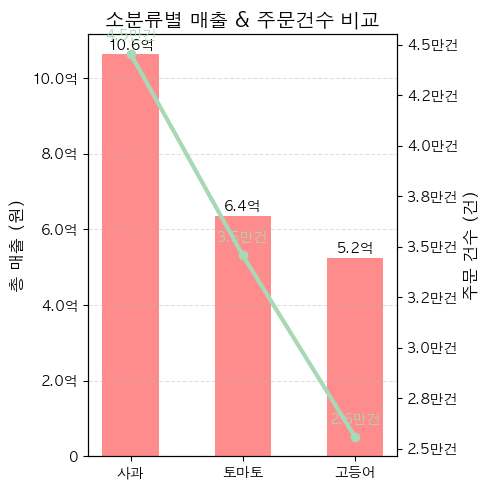

In [165]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Îç∞Ïù¥ÌÑ∞
item_names = ['ÏÇ¨Í≥º', 'ÌÜ†ÎßàÌÜ†', 'Í≥†Îì±Ïñ¥']
prices = [1062803760, 636566280, 524303940]
orders = [44558, 34571, 25582]

# Ïª¨Îü¨ ÏÑ§Ï†ï
color_bar = '#FF8C8C'   # Î∂ÄÎìúÎü¨Ïö¥ ÌïëÌÅ¨
color_line = '#A8D9B6'  # ÌååÏä§ÌÖî Í∑∏Î¶∞

# ÌïúÍ∏Ä Îã®ÏúÑ Ìè¨Îß∑ Ìï®Ïàò
def won_formatter(x, _):
    if x >= 1e8:
        return f'{x/1e8:.1f}Ïñµ'
    elif x >= 1e4:
        return f'{x/1e4:.0f}Îßå'
    else:
        return f'{int(x):,}'

def count_formatter(x, _):
    if x >= 1e4:
        return f'{x/1e4:.1f}ÎßåÍ±¥'
    elif x >= 1e3:
        return f'{x/1e3:.0f}Ï≤úÍ±¥'
    else:
        return f'{int(x)}Í±¥'

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(5, 5))

# ‚ñ∂ Îß§Ï∂ú ÎßâÎåÄ
bars = ax1.bar(item_names, prices, color=color_bar, label='Ï¥ù Îß§Ï∂ú', width=0.5)
ax1.set_ylabel('Ï¥ù Îß§Ï∂ú (Ïõê)', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.yaxis.set_major_formatter(FuncFormatter(won_formatter))

# ‚ñ∂ Ï£ºÎ¨∏ Ïàò ÏÑ†
ax2 = ax1.twinx()
ax2.plot(item_names, orders, color=color_line, marker='o', linewidth=3, label='Ï£ºÎ¨∏ Í±¥Ïàò')
ax2.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò (Í±¥)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.yaxis.set_major_formatter(FuncFormatter(count_formatter))

# ‚ñ∂ ÎùºÎ≤®, Í∑∏Î¶¨Îìú, Ï†úÎ™©
plt.title('ÏÜåÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú & Ï£ºÎ¨∏Í±¥Ïàò ÎπÑÍµê', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# ‚ñ∂ ÎßâÎåÄ ÏúÑÏóê Îß§Ï∂ú ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height + 5e6, won_formatter(height, None),
             ha='center', va='bottom', fontsize=10)

# ‚ñ∂ ÏÑ† ÏúÑÏóê Ï£ºÎ¨∏ Í±¥Ïàò ÌëúÏãú
for i, order in enumerate(orders):
    ax2.text(i, order + 500, count_formatter(order, None), ha='center', va='bottom', fontsize=10, color=color_line)

plt.tight_layout()
plt.show()


In [133]:
a_item

'ÏÇ¨Í≥º'

In [134]:
# a_itemÏù¥ Ìè¨Ìï®Îêú Ï£ºÎ¨∏Î≤àÌò∏ Ï∂îÏ∂ú
a_orders = df_top2_middle[df_top2_middle['ItemSmallName'] == a_item]['idOrder'].unique()

# Ìï¥Îãπ Ï£ºÎ¨∏Îì§ÏóêÏÑú ÏÜåÎ∂ÑÎ•ò Î™©Î°ù Ï∂îÏ∂ú
df_a_orders = df_top2_middle[df_top2_middle['idOrder'].isin(a_orders)]

# Ï£ºÎ¨∏Î≥ÑÎ°ú ÏÜåÎ∂ÑÎ•ò Î™©Î°ùÌôî
basket = df_a_orders.groupby('idOrder')['ItemSmallName'].unique().tolist()

# Ïó∞Í¥Ä Î∂ÑÏÑù Ï§ÄÎπÑ
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Ïó∞Í¥Ä Í∑úÏπô ÎèÑÏ∂ú (a_itemÏùÑ Ìè¨Ìï®Ìïú Í∑úÏπôÎßå ÌïÑÌÑ∞ÎßÅ)
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# a_itemÏù¥ Ìè¨Ìï®Îêú Ïó∞Í¥Ä Í∑úÏπôÎßå Î≥¥Í∏∞
rules_a = rules[rules['antecedents'].apply(lambda x: a_item in x or a_item in str(x)) |
                rules['consequents'].apply(lambda x: a_item in x or a_item in str(x))]

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
rules_a = rules_a.sort_values(['lift', 'confidence'], ascending=False)


In [135]:
rules_a[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents consequents   support  confidence      lift
84     (ÏÇ¨Í≥º, ÏàòÎ∞ï)         (ÍπÄ)  0.010189    0.164255  1.086529
87         (ÏàòÎ∞ï)     (ÏÇ¨Í≥º, ÍπÄ)  0.010189    0.164255  1.086529
86      (ÏÇ¨Í≥º, ÍπÄ)        (ÏàòÎ∞ï)  0.010189    0.067399  1.086529
89          (ÍπÄ)    (ÏÇ¨Í≥º, ÏàòÎ∞ï)  0.010189    0.067399  1.086529
53     (ÏÇ¨Í≥º, Í≥ºÏùº)       (Í≥†Îì±Ïñ¥)  0.013376    0.137169  1.035929
..          ...         ...       ...         ...       ...
81         (ÏÇ¨Í≥º)     (ÍπÄ, ÎØ∏Ïó≠)  0.010593    0.010593  1.000000
65         (ÏÇ¨Í≥º)   (Í≥†Îì±Ïñ¥, ÌÇ§ÏúÑ)  0.010526    0.010526  1.000000
88         (ÏÇ¨Í≥º)     (ÏàòÎ∞ï, ÍπÄ)  0.010189    0.010189  1.000000
105        (ÏÇ¨Í≥º)   (ÌÜ†ÎßàÌÜ†, ÎÇôÏßÄ)  0.010189    0.010189  1.000000
91         (ÏÇ¨Í≥º)    (Ïò§ÏßïÏñ¥, ÍπÄ)  0.010032    0.010032  1.000000

[108 rows x 5 columns]

ÏÇ¨Í≥ºÎäî Îã®Ïó∞ Ï£ºÎ†• ÏÉÅÌíàÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†, Ìï¥Îãπ ÏÉÅÌíàÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ìïú Í≥†Í∞ùÏùò Íµ¨Îß§ Ìå®ÌÑ¥Ïù¥ Î™ÖÌôïÌïòÏßÄ ÏïäÍ≥† Ïó∞Í¥ÄÏÑ±Ïù¥ ÎÜíÏùÄ Ï°∞Ìï©Ïù¥ Î∂ÄÏ°±

->  ÏÉÅÌíà Ï†ÑÎûµ, Ï∂îÏ≤ú ÏãúÏä§ÌÖú, Ìå®ÌÇ§ÏßÄ ÏÉÅÌíà Íµ¨ÏÑ±ÏóêÏÑú Í∏∞Ìöå ÏÜêÏã§ÏùÑ ÏùòÎØ∏

-> ÏÇ¨Í≥ºÎ•º Ï§ëÏã¨ÏúºÎ°ú Í≥†Í∞ù ÎùºÏù¥ÌîÑÏä§ÌÉÄÏùºÏóê ÎßûÎäî Ïó∞Í¥Ä ÏÉÅÌíà Í∏∞ÌöçÍ≥º ÌîÑÎ°úÎ™®ÏÖò Ïó∞Í≥Ñ Ï†ÑÎûµÏù¥ ÌïÑÏöî

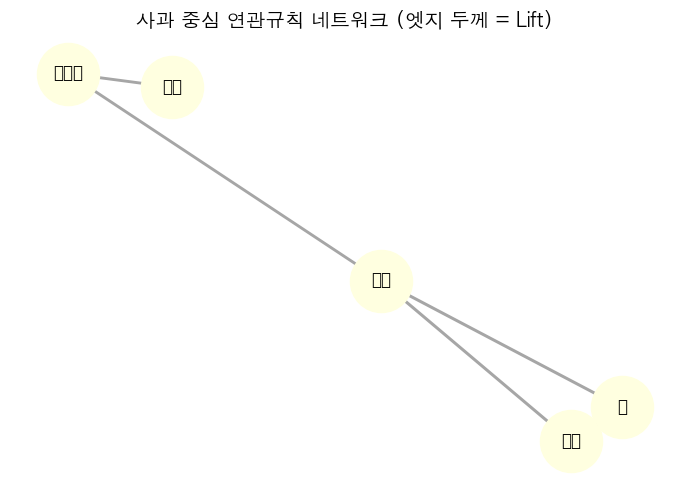

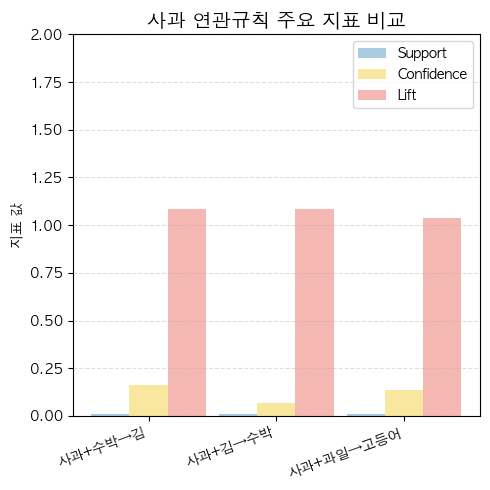

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.ticker import FuncFormatter

# Ïó∞Í¥Ä Í∑úÏπô Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'antecedents': [('ÏÇ¨Í≥º', 'ÏàòÎ∞ï'), ('ÏÇ¨Í≥º', 'ÍπÄ'), ('ÏÇ¨Í≥º', 'Í≥ºÏùº')],
    'consequents': [('ÍπÄ',), ('ÏàòÎ∞ï',), ('Í≥†Îì±Ïñ¥',)],
    'support': [0.010189]*3,
    'confidence': [0.164255, 0.067399, 0.137169],
    'lift': [1.086529, 1.086529, 1.035929]
}
df = pd.DataFrame(data)

# -----------------------------
# 1Ô∏è‚É£ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
# -----------------------------
G = nx.DiGraph()
for i, row in df.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'], confidence=row['confidence'])

pos = nx.spring_layout(G, seed=42)
weights = [d['weight'] for _, _, d in G.edges(data=True)]

plt.figure(figsize=(7, 5))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightyellow')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=[w * 2 for w in weights], arrows=True, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("ÏÇ¨Í≥º Ï§ëÏã¨ Ïó∞Í¥ÄÍ∑úÏπô ÎÑ§Ìä∏ÏõåÌÅ¨ (Ïó£ÏßÄ ÎëêÍªò = Lift)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# 2Ô∏è‚É£ Ïó∞Í¥ÄÍ∑úÏπô ÏßÄÌëú ÎπÑÍµê Í∑∏ÎûòÌîÑ
# -----------------------------
labels = ['ÏÇ¨Í≥º+ÏàòÎ∞ï‚ÜíÍπÄ', 'ÏÇ¨Í≥º+ÍπÄ‚ÜíÏàòÎ∞ï', 'ÏÇ¨Í≥º+Í≥ºÏùº‚ÜíÍ≥†Îì±Ïñ¥']
support = df['support']
confidence = df['confidence']
lift = df['lift']

x = range(len(labels))
width = 0.3

plt.figure(figsize=(5, 5))
plt.bar([p - width for p in x], support, width=width, label='Support', color='#A9CCE3')
plt.bar(x, confidence, width=width, label='Confidence', color='#F9E79F')
plt.bar([p + width for p in x], lift, width=width, label='Lift', color='#F5B7B1')
plt.ylim(0, 2.0)  # ‚úÖ yÏ∂ï ÏµúÎåÄÍ∞í ÎäòÎ†§ÏÑú lift ÎßâÎåÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏûëÍ≤å Î≥¥Ïù¥ÎèÑÎ°ù

plt.xticks(ticks=x, labels=labels, rotation=20, ha='right')
plt.ylabel('ÏßÄÌëú Í∞í')
plt.title('ÏÇ¨Í≥º Ïó∞Í¥ÄÍ∑úÏπô Ï£ºÏöî ÏßÄÌëú ÎπÑÍµê', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [148]:
# 1. 4060 Ïó∞Î†πÎåÄ ÌïÑÌÑ∞ÎßÅ
df_4060 = df[df['AgeGroup'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ'])].copy()

# 2. Í≥ºÏùº & Ï±ÑÏÜå Ï§ëÎ∂ÑÎ•ò ÌïÑÌÑ∞ÎßÅ
df_4060_fc = df_4060[df_4060['ItemMiddleName'].isin(['Í≥ºÏùº', 'Ï±ÑÏÜå'])].copy()

# 3. ÏÜåÎ∂ÑÎ•òÎ™Ö Ï†ÑÏ≤òÎ¶¨
df_4060_fc['ItemSmallName'] = df_4060_fc['ItemSmallName'].astype(str).str.replace(r"[^\w]", "", regex=True).str.lower()

# 4. Ï£ºÎ¨∏Î≤àÌò∏ Í∏∞Ï§Ä ÏÜåÎ∂ÑÎ•ò Î¨∂Í∏∞
basket_4060_fc = df_4060_fc.groupby('idOrder')['ItemSmallName'].unique().tolist()

# 5. 2Í∞ú Ïù¥ÏÉÅ ÌíàÎ™© Ï£ºÎ¨∏Îßå ÌïÑÌÑ∞ÎßÅ
basket_4060_fc_filtered = [b for b in basket_4060_fc if len(b) >= 2]

# 6. Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(basket_4060_fc_filtered).transform(basket_4060_fc_filtered)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 7. Apriori + Ïó∞Í¥Ä Í∑úÏπô
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 8. Í≤∞Í≥º Ï†ïÎ†¨
rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=False)

# 9. ÏÉÅÏúÑ 20Í∞ú Ï∂úÎ†•
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Ï§ëÎ∂ÑÎ•ò Í≥ºÏùº ÏïàÏóê ÏÜåÎ∂ÑÎ•ò Í≥ºÏùºÏùÄ Ï∫îÍ≥ºÏùº(Í∞ÄÍ≥µÏãùÌíà)
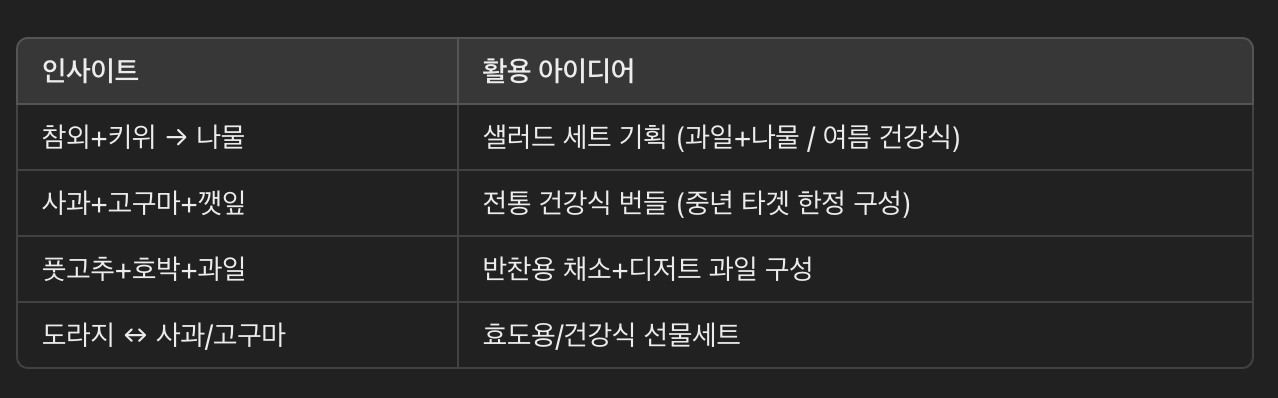

In [149]:
basket = df_all.groupby('idOrder')['ItemSmallName'].unique().reset_index()


In [150]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket['ItemSmallName']).transform(basket['ItemSmallName'])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)


In [151]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent = apriori(df_trans, min_support=0.001, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1.0)


In [152]:
rules_with_bread = rules[rules['antecedents'].apply(lambda x: 'Îπµ' in x)]
rules_with_bread = rules_with_bread.sort_values(by='lift', ascending=False)


In [153]:
print(rules_with_bread[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

     antecedents consequents   support  confidence      lift
2555         (Îπµ)    (ÏàòÎ∞ï, ÍπÄÏπò)  0.001079    0.013645  1.205147
2122      (Îπµ, ÍπÄ)        (ÌÇ§ÏúÑ)  0.001359    0.127741  1.196395
4126     (Ï¶âÏÑù, Îπµ)         (Ìåå)  0.001616    0.144723  1.187821
3126     (Îπµ, ÎÉâÎèô)         (Î∞∞)  0.001441    0.064407  1.135821
2552     (Îπµ, ÏÉùÏÑ†)        (ÍπÄÏπò)  0.001581    0.212716  1.133861
4725     (Îπµ, ÎÉâÎèô)   (ÏÇ¨Í≥º, Í≥†Íµ¨Îßà)  0.001237    0.055280  1.130473
2573         (Îπµ)    (ÍπÄÏπò, Ìò∏Î∞ï)  0.001732    0.021906  1.129768
4891     (Îπµ, ÎÉâÎèô)   (ÏÇ¨Í≥º, ÌÜ†ÎßàÌÜ†)  0.001085    0.048501  1.127239
3811     (Îπµ, Î©∏Ïπò)        (ÏÇ¨Í≥º)  0.001108    0.292308  1.124615
2130      (Îπµ, ÍπÄ)         (Ìåå)  0.001452    0.136513  1.120438


In [158]:
rules_with_pasta = rules[rules['antecedents'].apply(lambda x: 'ÌååÏä§ÌÉÄ' in x)]
rules_with_pasta = rules_with_pasta.sort_values(by='lift', ascending=False)

In [159]:
print(rules_with_pasta[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

     antecedents consequents   support  confidence      lift
2174    (ÍπÄ, ÌååÏä§ÌÉÄ)        (ÏÇ¨Í≥º)  0.001062    0.304348  1.170938
1045       (ÌååÏä§ÌÉÄ)   (Í≥†Íµ¨Îßà, ÍπÄÏπò)  0.001021    0.040660  1.167369
3273   (ÎÉâÎèô, ÌååÏä§ÌÉÄ)        (ÏÉÅÏ∂î)  0.001120    0.156863  1.159351
4304   (Ïª§Ìîº, ÌååÏä§ÌÉÄ)        (ÏÇ¨Í≥º)  0.001056    0.297209  1.143470
711        (ÌååÏä§ÌÉÄ)        (ÏÉÅÏ∂î)  0.003862    0.153810  1.136791
1373       (ÌååÏä§ÌÉÄ)   (ÏÇ¨Í≥º, Í≥†Íµ¨Îßà)  0.001394    0.055530  1.135574
2591       (ÌååÏä§ÌÉÄ)    (ÏÇ¨Í≥º, ÍπÄÏπò)  0.001149    0.045771  1.125611
1130   (ÎÉâÎèô, ÌååÏä§ÌÉÄ)       (Í≥†Íµ¨Îßà)  0.001802    0.252451  1.121161
3438   (ÎÉâÎèô, ÌååÏä§ÌÉÄ)       (ÌÜ†ÎßàÌÜ†)  0.001604    0.224673  1.114112
773        (ÌååÏä§ÌÉÄ)        (ÏàòÎ∞ï)  0.002106    0.083875  1.106151
